In [1]:
import numpy as np
import pyspark as ps
import pandas as pd
import os
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dir_path = "C:/Users/doruk/Desktop/Teknopar staj Repo/CMAPSSData/"

index_names = ['id', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

train = pd.read_csv((dir_path+'train_FD001.txt'), sep='\s+', names=col_names)
test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', names=col_names)

In [3]:
train

id  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   
...    ...          ...        ...        ...        ...     ...     ...   
20626  100          196    -0.0004    -0.0003      100.0  518.67  643.49   
20627  100          197    -0.0016    -0.0005      100.0  518.67  643.54   
20628  100          198     0.0004     0.0000      100.0  518.67  643.42   
20629  100          199    -0.0011     0.0003      100.0  518.67  643.23   
20630  100          200    -0.0032    -0.0005      100.0  518.67  643.85   

           s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  \
0      1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   
1      1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   
2      1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   
3      1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   
4      1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   
...        ...      ...    ...  ...     ...      ...      ...     ...   ...   
20626  1597.98  1428.63  14.62  ...  519.49  2388.26  8137.60  8.4956  0.03   
20627  1604.50  1433.58  14.62  ...  519.68  2388.22  8136.50  8.5139  0.03   
20628  1602.46  1428.18  14.62  ...  520.01  2388.24  8141.05  8.5646  0.03   
20629  1605.26  1426.53  14.62  ...  519.67  2388.23  8139.29  8.5389  0.03   
20630  1600.38  1432.14  14.62  ...  519.30  2388.26  8137.33  8.5036  0.03   

       s_17  s_18   s_19   s_20     s_21  
0       392  2388  100.0  39.06  23.4190  
1       392  2388  100.0  39.00  23.4236  
2       390  2388  100.0  38.95  23.3442  
3       392  2388  100.0  38.88  23.3739  
4       393  2388  100.0  38.90  23.4044  
...     ...   ...    ...    ...      ...  
20626   397  2388  100.0  38.49  22.9735  
20627   395  2388  100.0  38.30  23.1594  
20628   398  2388  100.0  38.44  22.9333  
20629   395  2388  100.0  38.29  23.0640  
20630   396  2388  100.0  38.37  23.0522  

[20631 rows x 26 columns]

In [4]:
train.describe()

id   time_cycles     setting_1     setting_2  setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

                s_1           s_2           s_3           s_4           s_5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

       ...          s_12          s_13          s_14          s_15  \
count  ...  20631.000000  20631.000000  20631.000000  20631.000000   
mean   ...    521.413470   2388.096152   8143.752722      8.442146   
std    ...      0.737553      0.071919     19.076176      0.037505   
min    ...    518.690000   2387.880000   8099.940000      8.324900   
25%    ...    520.960000   2388.040000   8133.245000      8.414900   
50%    ...    521.480000   2388.090000   8140.540000      8.438900   
75%    ...    521.950000   2388.140000   8148.310000      8.465600   
max    ...    523.380000   2388.560000   8293.720000      8.584800   

               s_16          s_17     s_18     s_19          s_20  \
count  2.063100e+04  20631.000000  20631.0  20631.0  20631.000000   
mean   3.000000e-02    393.210654   2388.0    100.0     38.816271   
std    1.556432e-14      1.548763      0.0      0.0      0.180746   
min    3.000000e-02    388.000000   2388.0    100.0     38.140000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.700000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.830000   
75%    3.000000e-02    394.000000   2388.0    100.0     38.950000   
max    3.000000e-02    400.000000   2388.0    100.0     39.430000   

               s_21  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400  

[8 rows x 26 columns]

In [5]:
for i in train.columns:
    print(i,"\t\t", train[i].mean())

id 		 51.506567786340945
time_cycles 		 108.80786195530997
setting_1 		 -8.870146866366216e-06
setting_2 		 2.350831273326574e-06
setting_3 		 100.0
s_1 		 518.6699999999346
s_2 		 642.6809335466004
s_3 		 1590.5231186079263
s_4 		 1408.933781687751
s_5 		 14.619999999996605
s_6 		 21.609803208753878
s_7 		 553.3677112112824
s_8 		 2388.0966516407484
s_9 		 9065.242940720273
s_10 		 1.299999999999534
s_11 		 47.54116814502418
s_12 		 521.4134700208454
s_13 		 2388.0961523920328
s_14 		 8143.752722117232
s_15 		 8.44214558189131
s_16 		 0.029999999999984435
s_17 		 393.2106538703892
s_18 		 2388.0
s_19 		 100.0
s_20 		 38.81627066065643
s_21 		 23.289705360864783


In [6]:
def add_remaining_useful_life(df):
    grouped_by_unit = df.groupby(by="id")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='id', right_index=True)

    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life

    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
  
train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

id  time_cycles  RUL
0   1            1  191
1   1            2  190
2   1            3  189
3   1            4  188
4   1            5  187

In [7]:
rul_data = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', names=['RUL'])
rul_data

RUL
0   112
1    98
2    69
3    82
4    91
..  ...
95  137
96   82
97   59
98  117
99   20

[100 rows x 1 columns]

In [8]:
grouped_by_unit = test.groupby(by="id")
last_rul = rul_data['RUL']
max_cycle = grouped_by_unit["time_cycles"].max()

result_frame1 = test.merge(last_rul.to_frame(name='last_rul'), left_on='id', right_index=True)
result_frame2 = test.merge(max_cycle.to_frame(name='max_cycle'), left_on='id', right_index=True)
remaining_useful_life =result_frame1['last_rul'] +(result_frame2["max_cycle"] - result_frame2["time_cycles"])
test["RUL"] = remaining_useful_life
test

id  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1     0.0023     0.0003      100.0  518.67  643.02   
1        1            2    -0.0027    -0.0003      100.0  518.67  641.71   
2        1            3     0.0003     0.0001      100.0  518.67  642.46   
3        1            4     0.0042     0.0000      100.0  518.67  642.44   
4        1            5     0.0014     0.0000      100.0  518.67  642.51   
...    ...          ...        ...        ...        ...     ...     ...   
13091  100          194     0.0049     0.0000      100.0  518.67  643.24   
13092  100          195    -0.0011    -0.0001      100.0  518.67  643.22   
13093  100          196    -0.0006    -0.0003      100.0  518.67  643.44   
13094  100          197    -0.0038     0.0001      100.0  518.67  643.26   
13095  100          198     0.0013     0.0003      100.0  518.67  642.95   

           s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  \
0      1585.29  1398.21  14.62  ...  2388.03  8125.55  8.4052  0.03   392   
1      1588.45  1395.42  14.62  ...  2388.06  8139.62  8.3803  0.03   393   
2      1586.94  1401.34  14.62  ...  2388.03  8130.10  8.4441  0.03   393   
3      1584.12  1406.42  14.62  ...  2388.05  8132.90  8.3917  0.03   391   
4      1587.19  1401.92  14.62  ...  2388.03  8129.54  8.4031  0.03   390   
...        ...      ...    ...  ...      ...      ...     ...   ...   ...   
13091  1599.45  1415.79  14.62  ...  2388.00  8213.28  8.4715  0.03   394   
13092  1595.69  1422.05  14.62  ...  2388.09  8210.85  8.4512  0.03   395   
13093  1593.15  1406.82  14.62  ...  2388.04  8217.24  8.4569  0.03   395   
13094  1594.99  1419.36  14.62  ...  2388.08  8220.48  8.4711  0.03   395   
13095  1601.62  1424.99  14.62  ...  2388.05  8214.64  8.4903  0.03   396   

       s_18   s_19   s_20     s_21    RUL  
0      2388  100.0  38.86  23.3735  128.0  
1      2388  100.0  39.02  23.3916  127.0  
2      2388  100.0  39.08  23.4166  126.0  
3      2388  100.0  39.00  23.3737  125.0  
4      2388  100.0  38.99  23.4130  124.0  
...     ...    ...    ...      ...    ...  
13091  2388  100.0  38.65  23.1974    NaN  
13092  2388  100.0  38.57  23.2771    NaN  
13093  2388  100.0  38.62  23.2051    NaN  
13094  2388  100.0  38.66  23.2699    NaN  
13095  2388  100.0  38.70  23.1855    NaN  

[13096 rows x 27 columns]

In [9]:
#test = add_remaining_useful_life(test)
#test[index_names+['RUL']].head()

In [10]:
train['label1']=np.where(train['RUL']<=30,1,0)
train['label2']=np.where(train['RUL']<=30,np.where(train['RUL']<=15,2,1),0)
train[index_names+['RUL']+['label1']+['label2']].head(192)

id  time_cycles  RUL  label1  label2
0     1            1  191       0       0
1     1            2  190       0       0
2     1            3  189       0       0
3     1            4  188       0       0
4     1            5  187       0       0
..   ..          ...  ...     ...     ...
187   1          188    4       1       2
188   1          189    3       1       2
189   1          190    2       1       2
190   1          191    1       1       2
191   1          192    0       1       2

[192 rows x 5 columns]

In [11]:
test['label1']=np.where(test['RUL']<=30,1,0)
test['label2']=np.where(test['RUL']<=30,np.where(test['RUL']<=15,2,1),0)
test[index_names+['RUL']+['label1']+['label2']].head()

id  time_cycles    RUL  label1  label2
0   1            1  128.0       0       0
1   1            2  127.0       0       0
2   1            3  126.0       0       0
3   1            4  125.0       0       0
4   1            5  124.0       0       0

In [12]:
def plot_sensor(df,sensor_name,lim):
    plt.figure(figsize=(13,5))
    plt.plot('RUL', sensor_name,data=df[df['id']==15])
    plt.xlim(lim,0)
    plt.xticks(np.arange(0, lim+25, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('RUL')
    plt.show()

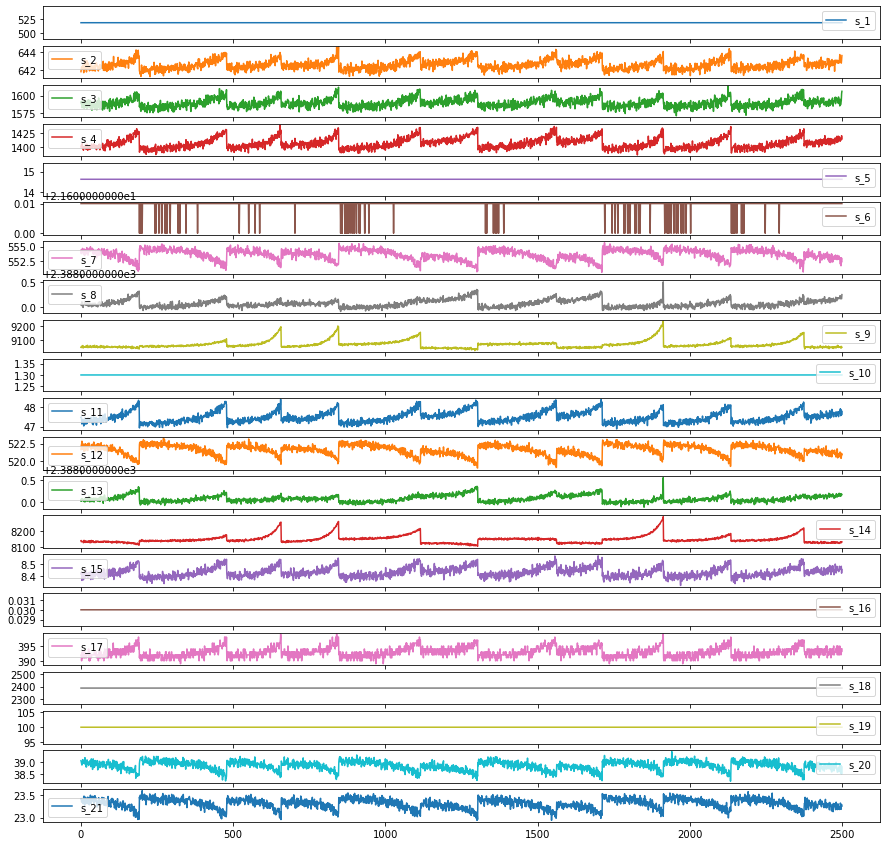

In [13]:
t = pd.DataFrame(train[sensor_names].loc[:2500].values, columns=sensor_names).plot(subplots=True, figsize=(15, 15))

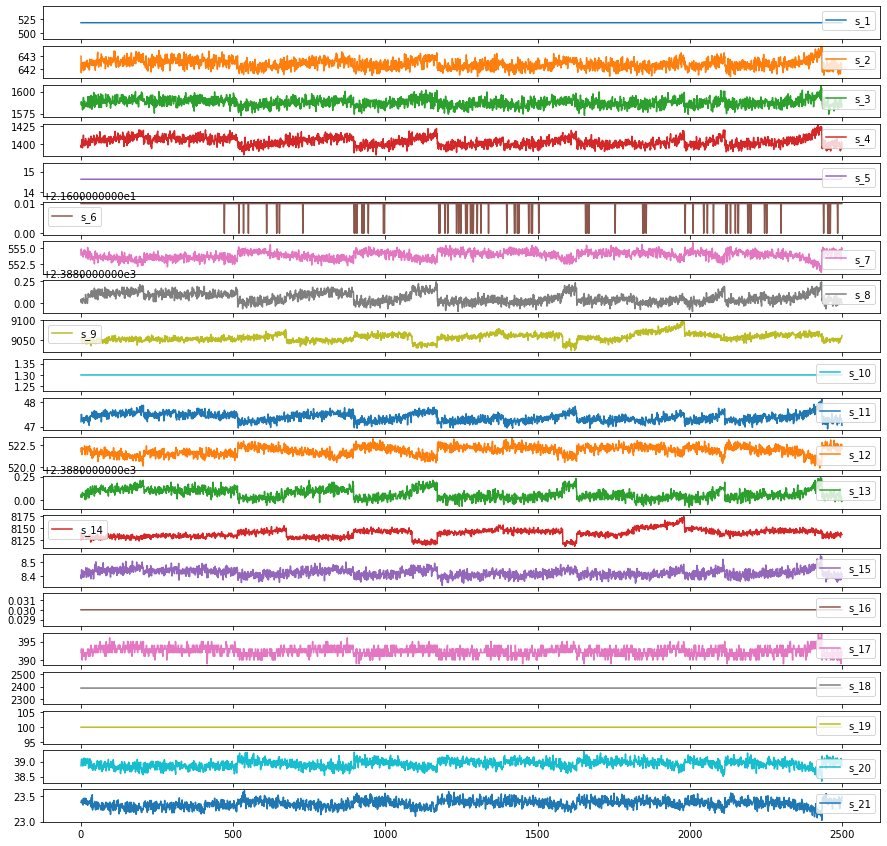

In [14]:
t = pd.DataFrame(test[sensor_names].loc[:2500].values, columns=sensor_names).plot(subplots=True, figsize=(15, 15))

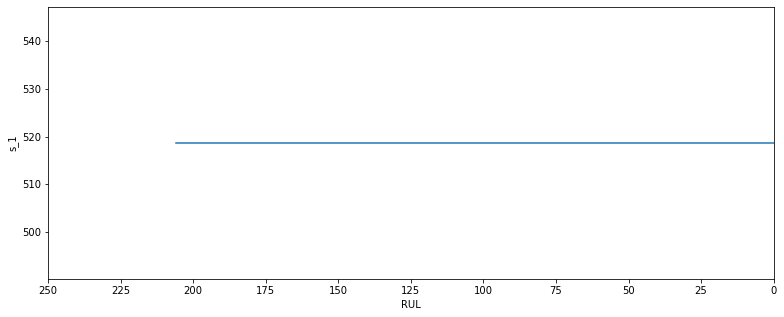

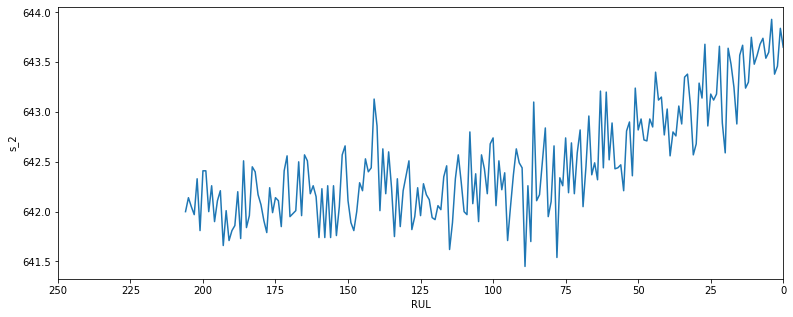

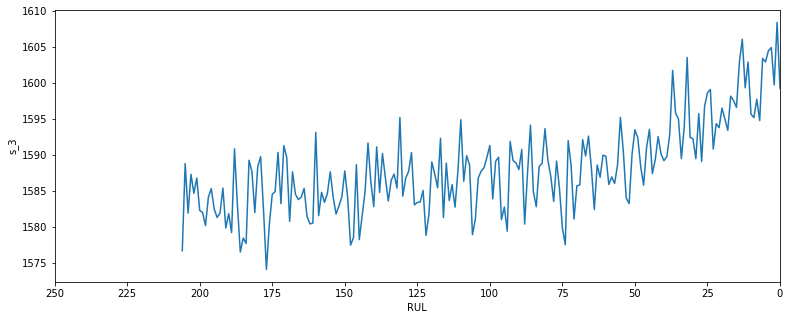

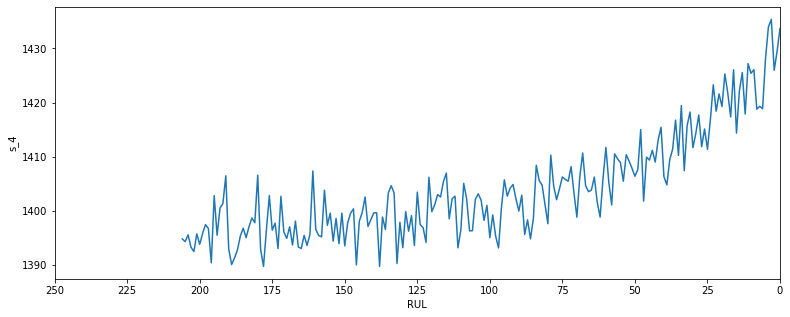

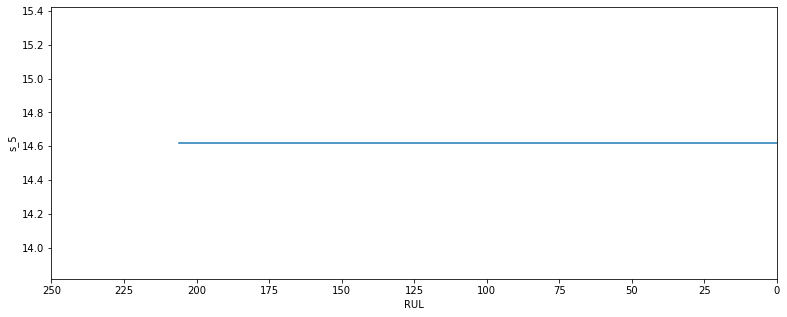

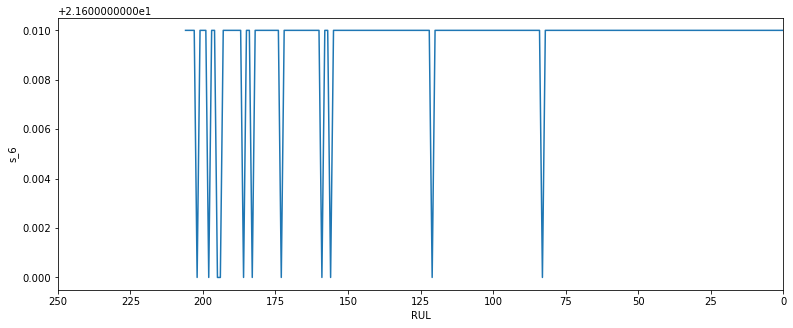

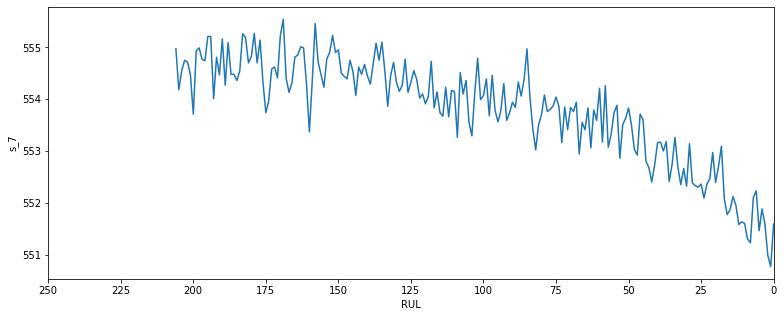

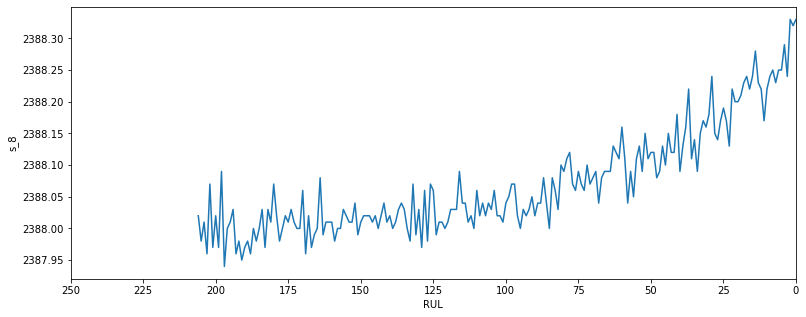

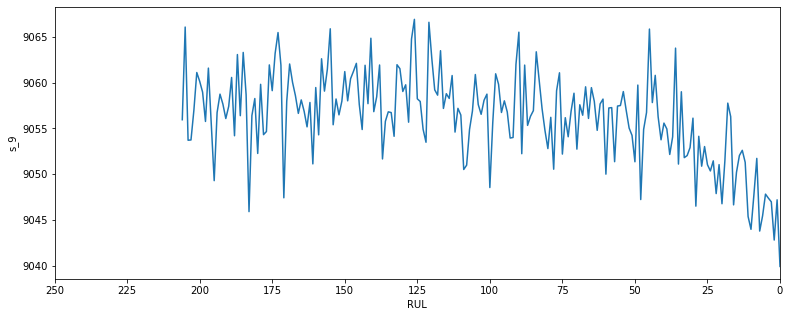

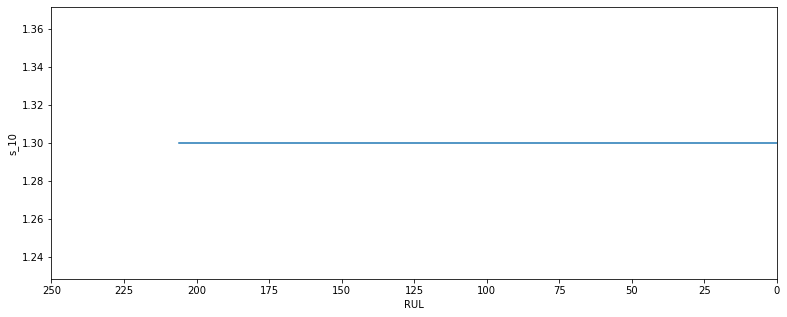

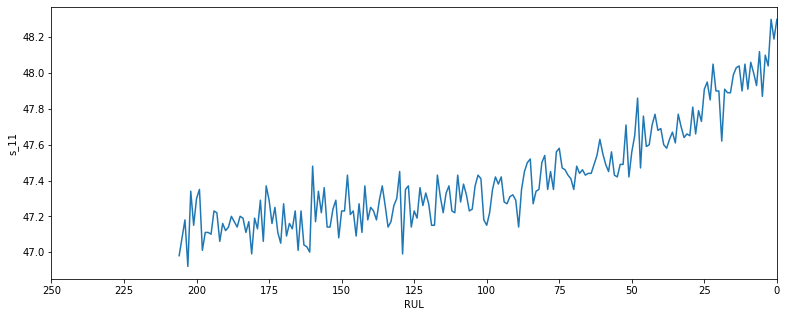

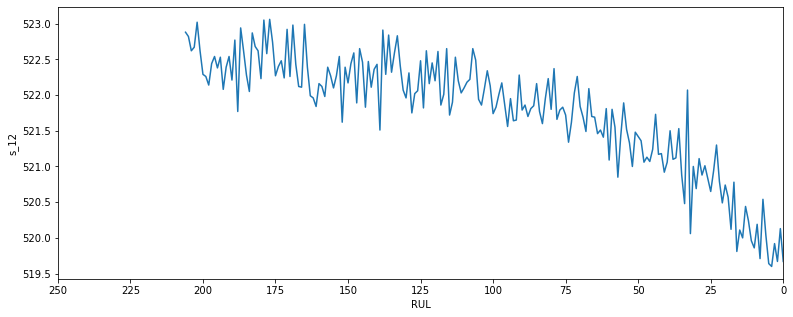

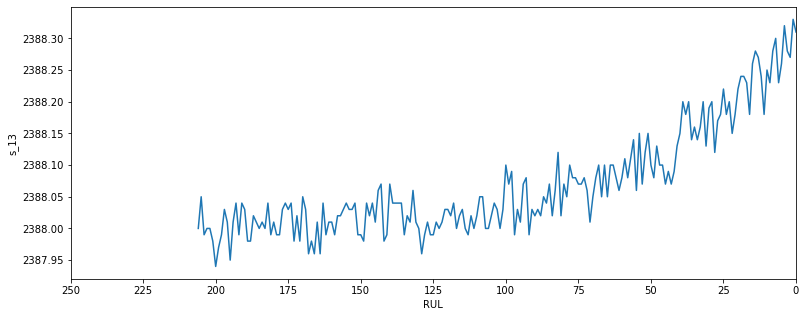

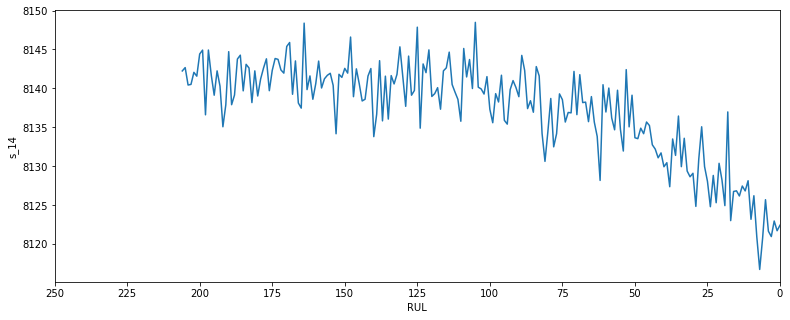

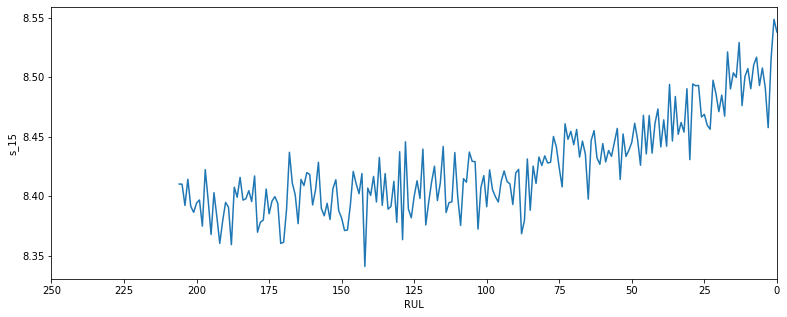

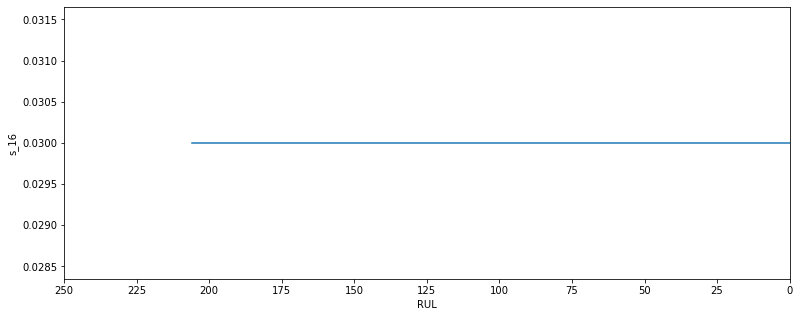

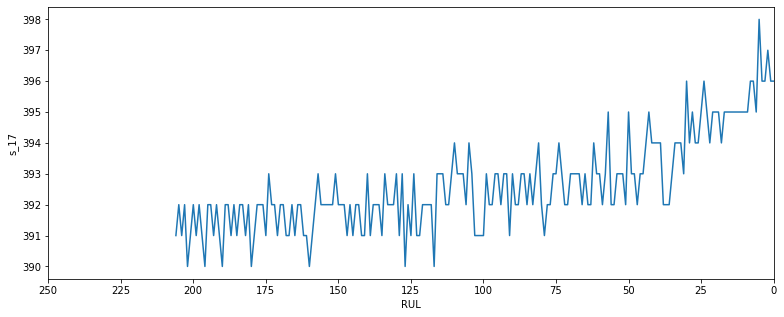

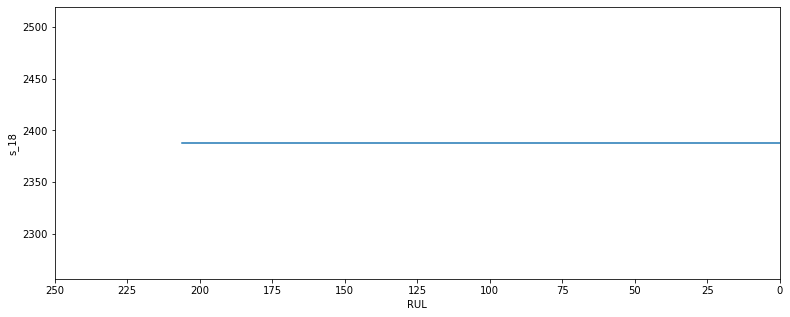

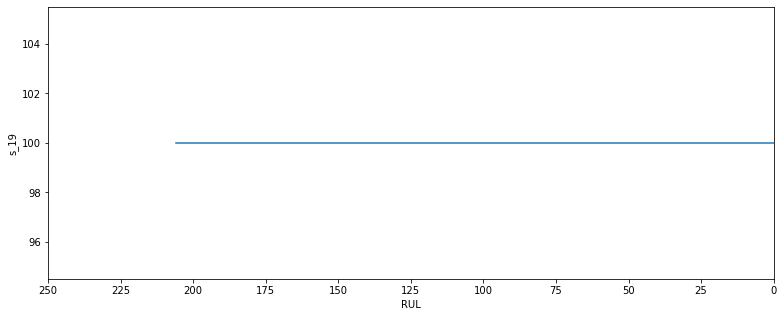

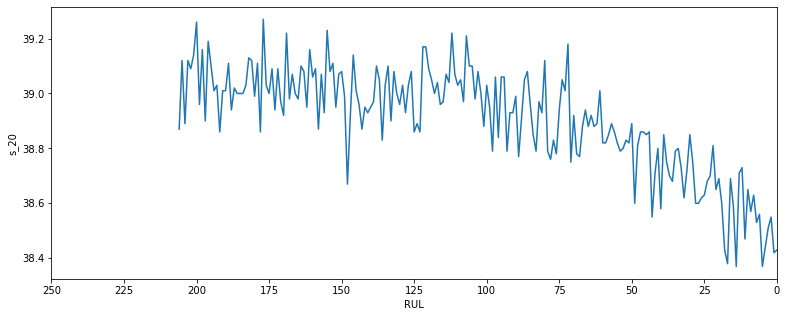

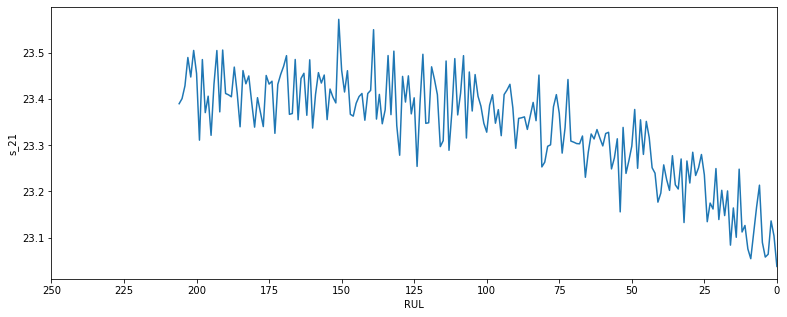

In [15]:
for sensor_name in sensor_names:
    plot_sensor(train,sensor_name,250)

In [16]:
print(train['s_3'].describe().loc['std']*train['s_3'].describe().loc['std'])

37.59099443280457


In [17]:
def remove_low_var_features(df, features, threshold):
    low_var_features = []
    low_var_values = []
    non_low_var=[]

    for f in features:
        
        std=train[f].describe().loc['std']
        
        var = std*std

        if var <= threshold:
            low_var_features.append(f)
            low_var_values.append(var)
            
            print(f + ': var: ' + str(var))
            df=df.drop(f,axis=1)
        else:
            non_low_var.append(f)
    
    return df, low_var_features, low_var_values,non_low_var

In [18]:
train.var()[:]

id             8.542545e+02
time_cycles    4.744591e+03
setting_1      4.784340e-06
setting_2      8.588541e-08
setting_3      0.000000e+00
s_1            4.273435e-21
s_2            2.500533e-01
s_3            3.759099e+01
s_4            8.101089e+01
s_5            1.152399e-23
s_6            1.929279e-06
s_7            7.833883e-01
s_8            5.038938e-03
s_9            4.876536e+02
s_10           2.172333e-25
s_11           7.133568e-02
s_12           5.439850e-01
s_13           5.172330e-03
s_14           3.639005e+02
s_15           1.406628e-03
s_16           2.422479e-28
s_17           2.398667e+00
s_18           0.000000e+00
s_19           0.000000e+00
s_20           3.266927e-02
s_21           1.171825e-02
RUL            4.744591e+03
label1         1.276876e-01
label2         3.310364e-01
dtype: float64

In [19]:
data_features = ['s_{}'.format(i) for i in range(1,22)]
data_features.append('setting_1')
data_features.append('setting_2')
data_features.append('setting_3')
new_train=pd.DataFrame()
print("Low variances")
train, train_low_var_features, train_low_var_values,non_low_var = remove_low_var_features(train, data_features, 0.05)

Low variances
s_1: var: 4.273435105741705e-21
s_5: var: 1.1523989399807532e-23
s_6: var: 1.9292790877278185e-06
s_8: var: 0.005038938213373092
s_10: var: 2.172332897777525e-25
s_13: var: 0.005172330435259868
s_15: var: 0.0014066278717784722
s_16: var: 2.422479399583144e-28
s_18: var: 0.0
s_19: var: 0.0
s_20: var: 0.03266927118908903
s_21: var: 0.011718251883038697
setting_1: var: 4.784340124242352e-06
setting_2: var: 8.588540885521097e-08
setting_3: var: 0.0


In [20]:
for i in train_low_var_features:
    test=test.drop(i,axis=1)

In [21]:
train.head(180)

id  time_cycles     s_2      s_3      s_4     s_7      s_9   s_11  \
0     1            1  641.82  1589.70  1400.60  554.36  9046.19  47.47   
1     1            2  642.15  1591.82  1403.14  553.75  9044.07  47.49   
2     1            3  642.35  1587.99  1404.20  554.26  9052.94  47.27   
3     1            4  642.35  1582.79  1401.87  554.45  9049.48  47.13   
4     1            5  642.37  1582.85  1406.22  554.00  9055.15  47.28   
..   ..          ...     ...      ...      ...     ...      ...    ...   
175   1          176  642.86  1592.27  1422.73  551.91  9045.74  47.84   
176   1          177  643.79  1602.02  1423.99  551.93  9046.20  48.03   
177   1          178  643.38  1605.33  1424.65  552.18  9046.17  48.00   
178   1          179  642.86  1592.56  1429.45  551.57  9044.23  48.02   
179   1          180  643.58  1599.87  1417.14  552.91  9039.33  47.85   

       s_12     s_14  s_17  RUL  label1  label2  
0    521.66  8138.62   392  191       0       0  
1    522.28  8131.49   392  190       0       0  
2    522.42  8133.23   390  189       0       0  
3    522.86  8133.83   392  188       0       0  
4    522.19  8133.80   393  187       0       0  
..      ...      ...   ...  ...     ...     ...  
175  519.80  8123.80   394   16       1       1  
176  520.24  8120.11   396   15       1       2  
177  520.20  8116.56   395   14       1       2  
178  520.38  8116.84   395   13       1       2  
179  519.84  8122.57   395   12       1       2  

[180 rows x 14 columns]

In [22]:
test.head(33)

id  time_cycles     s_2      s_3      s_4     s_7      s_9   s_11    s_12  \
0    1            1  643.02  1585.29  1398.21  553.90  9050.17  47.20  521.72   
1    1            2  641.71  1588.45  1395.42  554.85  9054.42  47.50  522.16   
2    1            3  642.46  1586.94  1401.34  554.11  9056.96  47.50  521.97   
3    1            4  642.44  1584.12  1406.42  554.07  9045.29  47.28  521.38   
4    1            5  642.51  1587.19  1401.92  554.16  9044.55  47.31  522.15   
5    1            6  642.11  1579.12  1395.13  554.22  9050.96  47.26  521.92   
6    1            7  642.11  1583.34  1404.84  553.89  9051.39  47.31  522.01   
7    1            8  642.54  1580.89  1400.89  553.59  9052.86  47.21  522.09   
8    1            9  641.88  1593.29  1412.28  554.49  9048.55  47.37  522.03   
9    1           10  642.07  1585.25  1398.64  554.28  9051.95  47.14  522.00   
10   1           11  642.04  1581.03  1403.83  554.69  9051.67  47.23  521.95   
11   1           12  642.54  1587.43  1397.82  554.35  9050.02  47.27  522.01   
12   1           13  641.94  1589.09  1403.94  554.04  9045.67  47.35  522.37   
13   1           14  642.23  1583.16  1402.88  554.66  9045.30  47.24  521.95   
14   1           15  642.50  1584.81  1398.79  554.15  9052.59  47.35  521.38   
15   1           16  642.32  1584.51  1407.76  553.82  9041.94  47.39  522.16   
16   1           17  642.19  1582.70  1404.12  554.42  9045.85  47.27  522.09   
17   1           18  642.59  1586.53  1403.69  553.50  9048.12  47.44  522.14   
18   1           19  642.43  1585.58  1402.30  553.87  9046.90  47.25  522.06   
19   1           20  642.61  1587.78  1400.70  554.31  9041.12  47.46  522.28   
20   1           21  642.70  1583.30  1399.20  554.42  9053.73  47.36  522.05   
21   1           22  642.45  1582.78  1404.06  553.43  9046.45  47.26  521.41   
22   1           23  642.12  1587.51  1395.09  555.07  9052.06  47.19  522.00   
23   1           24  642.32  1594.29  1400.15  553.27  9043.32  47.29  522.06   
24   1           25  642.25  1582.43  1400.23  553.76  9043.80  47.37  522.26   
25   1           26  642.48  1583.28  1408.07  554.59  9053.43  47.33  521.95   
26   1           27  642.08  1586.65  1400.31  554.35  9046.10  47.34  521.82   
27   1           28  641.93  1594.25  1401.29  553.56  9055.56  47.05  521.84   
28   1           29  641.95  1587.15  1398.11  554.15  9046.11  47.42  522.39   
29   1           30  642.79  1585.72  1400.97  554.10  9047.45  47.40  521.78   
30   1           31  642.58  1581.22  1398.91  554.42  9056.40  47.23  521.79   
31   2            1  642.66  1589.30  1407.16  553.14  9040.20  47.43  521.62   
32   2            2  642.51  1588.43  1405.47  553.53  9053.77  47.45  522.02   

       s_14  s_17    RUL  label1  label2  
0   8125.55   392  128.0       0       0  
1   8139.62   393  127.0       0       0  
2   8130.10   393  126.0       0       0  
3   8132.90   391  125.0       0       0  
4   8129.54   390  124.0       0       0  
5   8127.46   392  123.0       0       0  
6   8134.97   391  122.0       0       0  
7   8125.93   393  121.0       0       0  
8   8134.15   391  120.0       0       0  
9   8134.08   391  119.0       0       0  
10  8132.38   391  118.0       0       0  
11  8132.33   391  117.0       0       0  
12  8131.12   392  116.0       0       0  
13  8130.30   392  115.0       0       0  
14  8133.62   392  114.0       0       0  
15  8133.83   390  113.0       0       0  
16  8126.78   391  112.0       0       0  
17  8133.22   391  111.0       0       0  
18  8129.31   391  110.0       0       0  
19  8128.59   392  109.0       0       0  
20  8126.86   392  108.0       0       0  
21  8128.89   392  107.0       0       0  
22  8130.97   393  106.0       0       0  
23  8130.70   393  105.0       0       0  
24  8128.65   393  104.0       0       0  
25  8129.12   391  103.0       0       0  
26  8127.24   392  102.0       0       0  
27  8134.89   392  101.0       0       0  
28

In [23]:
for i in non_low_var:
    train['rollingmean4_'+str(i)] = train[str(i)].rolling(window=4,min_periods=1).mean()

In [24]:
for i in non_low_var:
    test['rollingmean4_'+str(i)] = test[str(i)].rolling(window=4,min_periods=1).mean()

In [25]:
train.head(62000)

id  time_cycles     s_2      s_3      s_4     s_7      s_9   s_11  \
0        1            1  641.82  1589.70  1400.60  554.36  9046.19  47.47   
1        1            2  642.15  1591.82  1403.14  553.75  9044.07  47.49   
2        1            3  642.35  1587.99  1404.20  554.26  9052.94  47.27   
3        1            4  642.35  1582.79  1401.87  554.45  9049.48  47.13   
4        1            5  642.37  1582.85  1406.22  554.00  9055.15  47.28   
...    ...          ...     ...      ...      ...     ...      ...    ...   
20626  100          196  643.49  1597.98  1428.63  551.43  9065.52  48.07   
20627  100          197  643.54  1604.50  1433.58  550.86  9065.11  48.04   
20628  100          198  643.42  1602.46  1428.18  550.94  9065.90  48.09   
20629  100          199  643.23  1605.26  1426.53  550.68  9073.72  48.39   
20630  100          200  643.85  1600.38  1432.14  550.79  9061.48  48.20   

         s_12     s_14  ...  label2  rollingmean4_s_2  rollingmean4_s_3  \
0      521.66  8138.62  ...       0        641.820000       1589.700000   
1      522.28  8131.49  ...       0        641.985000       1590.760000   
2      522.42  8133.23  ...       0        642.106667       1589.836667   
3      522.86  8133.83  ...       0        642.167500       1588.075000   
4      522.19  8133.80  ...       0        642.305000       1586.362500   
...       ...      ...  ...     ...               ...               ...   
20626  519.49  8137.60  ...       2        643.427500       1598.780000   
20627  519.68  8136.50  ...       2        643.540000       1599.952500   
20628  520.01  8141.05  ...       2        643.465000       1601.245000   
20629  519.67  8139.29  ...       2        643.420000       1602.550000   
20630  519.30  8137.33  ...       2        643.510000       1603.150000   

       rollingmean4_s_4  rollingmean4_s_7  rollingmean4_s_9  \
0           1400.600000        554.360000       9046.190000   
1           1401.870000        554.055000       9045.130000   
2           1402.646667        554.123333       9047.733333   
3           1402.452500        554.205000       9048.170000   
4           1403.857500        554.115000       9050.410000   
...                 ...               ...               ...   
20626       1429.217500        551.720000       9067.907500   
20627       1430.380000        551.425000       9067.292500   
20628       1430.572500        551.162500       9066.555000   
20629       1429.230000        550.977500       9067.562500   
20630       1430.107500        550.817500       9066.552500   

       rollingmean4_s_11  rollingmean4_s_12  rollingmean4_s_14  \
0                47.4700           521.6600        8138.620000   
1                47.4800           521.9700        8135.055000   
2                47.4100           522.1200        8134.446667   
3                47.3400           522.3050        8134.292500   
4                47.2925           522.4375        8133.087500   
...                  ...                ...                ...   
20626            48.1500           519.7150        8140.547500   
20627            48.1125           519.6075        8139.167500   
20628            48.1050           519.7225        8139.512500   
20629            48.1475           519.7125        8138.610000   
20630            48.1800           519.6650        8138.542500   

       rollingmean4_s_17  
0             392.000000  
1             392.000000  
2             391.333333  
3             391.500000  
4             391.750000  
...                  ...  
20626         395.500000  
20627         395.000000  
20628         396.000000  
20629         396.250000  
20630         396.000000  

[20631 rows x 23 columns]

In [26]:
test.head(62000)

id  time_cycles     s_2      s_3      s_4     s_7      s_9   s_11  \
0        1            1  643.02  1585.29  1398.21  553.90  9050.17  47.20   
1        1            2  641.71  1588.45  1395.42  554.85  9054.42  47.50   
2        1            3  642.46  1586.94  1401.34  554.11  9056.96  47.50   
3        1            4  642.44  1584.12  1406.42  554.07  9045.29  47.28   
4        1            5  642.51  1587.19  1401.92  554.16  9044.55  47.31   
...    ...          ...     ...      ...      ...     ...      ...    ...   
13091  100          194  643.24  1599.45  1415.79  553.41  9142.37  47.69   
13092  100          195  643.22  1595.69  1422.05  553.22  9140.68  47.60   
13093  100          196  643.44  1593.15  1406.82  553.04  9146.81  47.57   
13094  100          197  643.26  1594.99  1419.36  553.37  9148.85  47.61   
13095  100          198  642.95  1601.62  1424.99  552.48  9155.03  47.80   

         s_12     s_14  ...  label2  rollingmean4_s_2  rollingmean4_s_3  \
0      521.72  8125.55  ...       0        643.020000       1585.290000   
1      522.16  8139.62  ...       0        642.365000       1586.870000   
2      521.97  8130.10  ...       0        642.396667       1586.893333   
3      521.38  8132.90  ...       0        642.407500       1586.200000   
4      522.15  8129.54  ...       0        642.280000       1586.675000   
...       ...      ...  ...     ...               ...               ...   
13091  520.69  8213.28  ...       0        643.077500       1595.692500   
13092  521.05  8210.85  ...       0        643.152500       1597.230000   
13093  521.18  8217.24  ...       0        643.250000       1595.972500   
13094  521.33  8220.48  ...       0        643.290000       1595.820000   
13095  521.07  8214.64  ...       0        643.217500       1596.362500   

       rollingmean4_s_4  rollingmean4_s_7  rollingmean4_s_9  \
0           1398.210000        553.900000         9050.1700   
1           1396.815000        554.375000         9052.2950   
2           1398.323333        554.286667         9053.8500   
3           1400.347500        554.232500         9051.7100   
4           1401.275000        554.297500         9050.3050   
...                 ...               ...               ...   
13091       1415.660000        553.247500         9140.0900   
13092       1417.760000        553.242500         9141.2125   
13093       1414.820000        553.212500         9142.4350   
13094       1416.005000        553.260000         9144.6775   
13095       1418.305000        553.027500         9147.8425   

       rollingmean4_s_11  rollingmean4_s_12  rollingmean4_s_14  \
0                47.2000           521.7200        8125.550000   
1                47.3500           521.9400        8132.585000   
2                47.4000           521.9500        8131.756667   
3                47.3700           521.8075        8132.042500   
4                47.3975           521.9150        8133.040000   
...                  ...                ...                ...   
13091            47.6125           521.0700        8209.757500   
13092            47.6100           521.0250        8211.985000   
13093            47.6100           521.0725        8213.735000   
13094            47.6175           521.0625        8215.462500   
13095            47.6450           521.1575        8215.802500   

       rollingmean4_s_17  
0             392.000000  
1             392.500000  
2             392.666667  
3             392.250000  
4             391.750000  
...                  ...  
13091         395.000000  
13092         394.750000  
13093         394.750000  
13094         394.750000  
13095         395.250000  

[13096 rows x 23 columns]

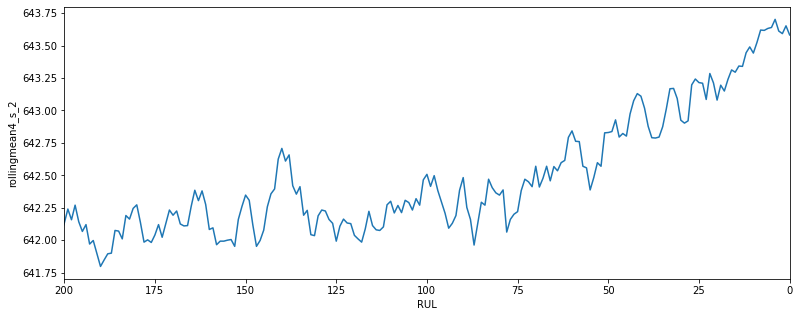

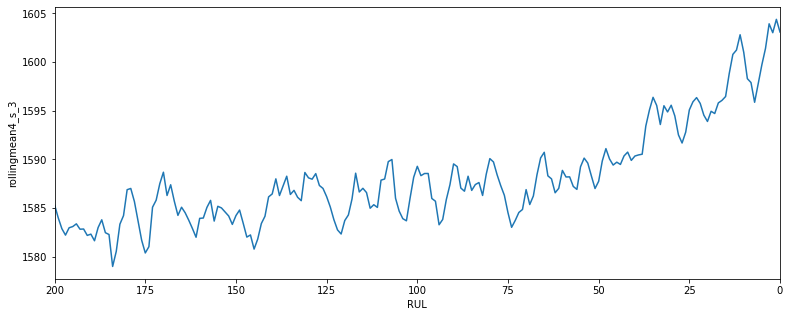

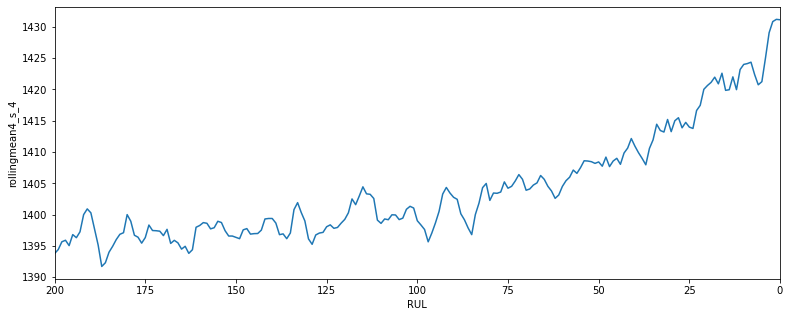

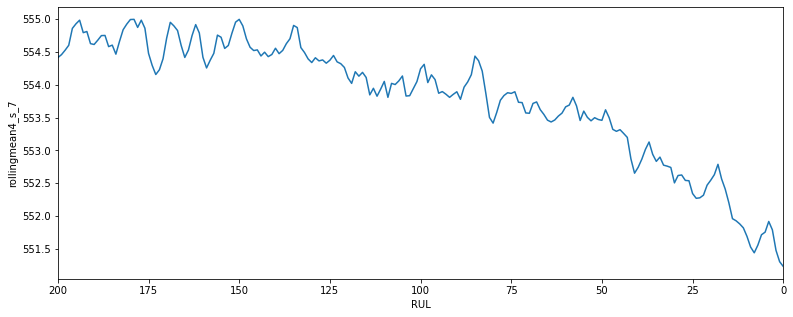

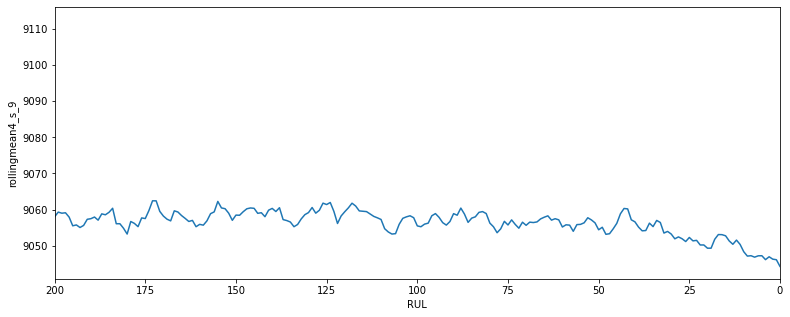

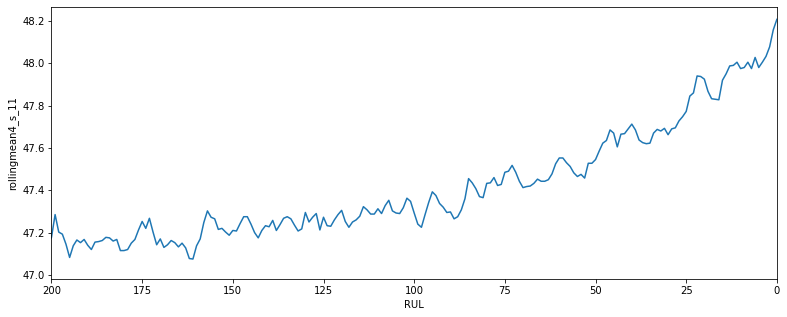

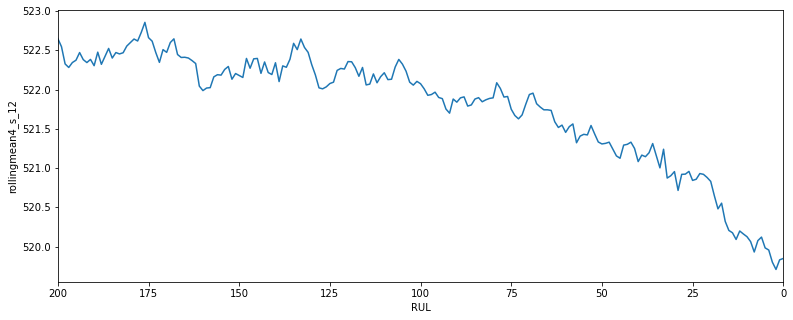

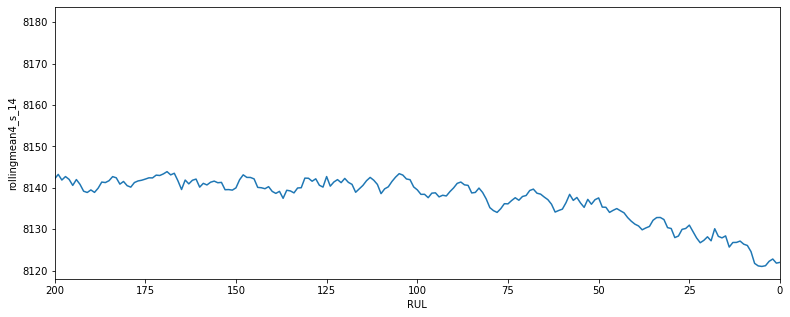

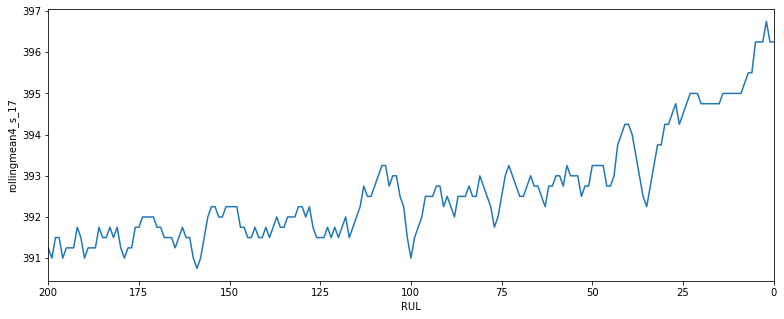

In [27]:
rolling_sensor_names = ['rollingmean4_{}'.format(i) for i in non_low_var] 

for sensor_name in rolling_sensor_names:
    plot_sensor(train,sensor_name,200)

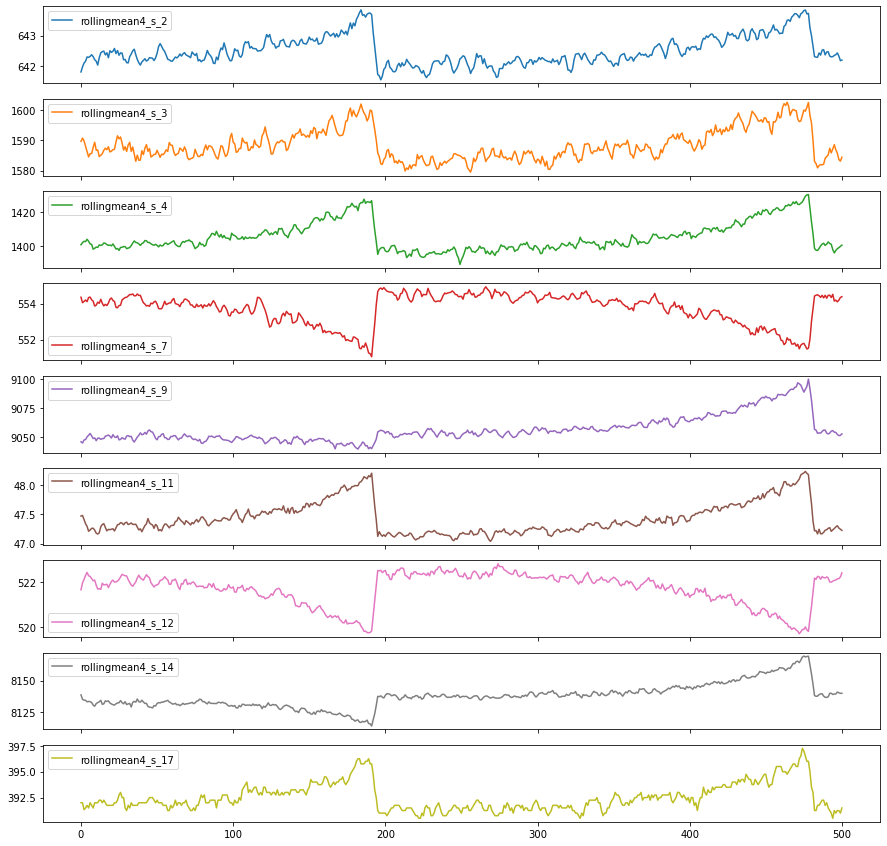

In [28]:
t = pd.DataFrame(train[rolling_sensor_names].loc[:500].values, columns=rolling_sensor_names).plot(subplots=True, figsize=(15, 15))

In [29]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

temp_df=pd.DataFrame()
cols_normalize = rolling_sensor_names
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train[cols_normalize]), 
                            columns=cols_normalize, 
                            index=train.index)
for feature_name in rolling_sensor_names:
    temp_df['norm_'+feature_name] = norm_train_df[feature_name]
temp_df

norm_rollingmean4_s_2  norm_rollingmean4_s_3  norm_rollingmean4_s_4  \
0                   0.100990               0.412918               0.264754   
1                   0.166337               0.445137               0.293170   
2                   0.214521               0.417072               0.310548   
3                   0.238614               0.363526               0.306204   
4                   0.293069               0.311474               0.337641   
...                      ...                    ...                    ...   
20626               0.737624               0.688906               0.905074   
20627               0.782178               0.724544               0.931085   
20628               0.752475               0.763830               0.935392   
20629               0.734653               0.803495               0.905353   
20630               0.770297               0.821733               0.924987   

       norm_rollingmean4_s_7  norm_rollingmean4_s_9  norm_rollingmean4_s_11  \
0                   0.799124               0.095070                0.359316   
1                   0.732348               0.089739                0.366920   
2                   0.747309               0.102832                0.313688   
3                   0.765189               0.105028                0.260456   
4                   0.745484               0.116294                0.224335   
...                      ...                    ...                     ...   
20626               0.221128               0.204298                0.876426   
20627               0.156541               0.201205                0.847909   
20628               0.099070               0.197495                0.842205   
20629               0.058566               0.202563                0.874525   
20630               0.023536               0.197483                0.899240   

       norm_rollingmean4_s_12  norm_rollingmean4_s_14  norm_rollingmean4_s_17  
0                    0.657333                0.196097                0.281250  
1                    0.740000                0.176400                0.281250  
2                    0.780000                0.173039                0.197917  
3                    0.829333                0.172187                0.218750  
4                    0.864667                0.165529                0.250000  
...                       ...                     ...                     ...  
20626                0.138667                0.206746                0.718750  
20627                0.110000                0.199122                0.656250  
20628                0.140667                0.201028                0.781250  
20629                0.138000                0.196041                0.812500  
20630                0.125333                0.195668                0.781250  

[20631 rows x 9 columns]

In [30]:
train=pd.concat([train, temp_df], axis=1, join="inner")
train

id  time_cycles     s_2      s_3      s_4     s_7      s_9   s_11  \
0        1            1  641.82  1589.70  1400.60  554.36  9046.19  47.47   
1        1            2  642.15  1591.82  1403.14  553.75  9044.07  47.49   
2        1            3  642.35  1587.99  1404.20  554.26  9052.94  47.27   
3        1            4  642.35  1582.79  1401.87  554.45  9049.48  47.13   
4        1            5  642.37  1582.85  1406.22  554.00  9055.15  47.28   
...    ...          ...     ...      ...      ...     ...      ...    ...   
20626  100          196  643.49  1597.98  1428.63  551.43  9065.52  48.07   
20627  100          197  643.54  1604.50  1433.58  550.86  9065.11  48.04   
20628  100          198  643.42  1602.46  1428.18  550.94  9065.90  48.09   
20629  100          199  643.23  1605.26  1426.53  550.68  9073.72  48.39   
20630  100          200  643.85  1600.38  1432.14  550.79  9061.48  48.20   

         s_12     s_14  ...  rollingmean4_s_17  norm_rollingmean4_s_2  \
0      521.66  8138.62  ...         392.000000               0.100990   
1      522.28  8131.49  ...         392.000000               0.166337   
2      522.42  8133.23  ...         391.333333               0.214521   
3      522.86  8133.83  ...         391.500000               0.238614   
4      522.19  8133.80  ...         391.750000               0.293069   
...       ...      ...  ...                ...                    ...   
20626  519.49  8137.60  ...         395.500000               0.737624   
20627  519.68  8136.50  ...         395.000000               0.782178   
20628  520.01  8141.05  ...         396.000000               0.752475   
20629  519.67  8139.29  ...         396.250000               0.734653   
20630  519.30  8137.33  ...         396.000000               0.770297   

       norm_rollingmean4_s_3  norm_rollingmean4_s_4  norm_rollingmean4_s_7  \
0                   0.412918               0.264754               0.799124   
1                   0.445137               0.293170               0.732348   
2                   0.417072               0.310548               0.747309   
3                   0.363526               0.306204               0.765189   
4                   0.311474               0.337641               0.745484   
...                      ...                    ...                    ...   
20626               0.688906               0.905074               0.221128   
20627               0.724544               0.931085               0.156541   
20628               0.763830               0.935392               0.099070   
20629               0.803495               0.905353               0.058566   
20630               0.821733               0.924987               0.023536   

       norm_rollingmean4_s_9  norm_rollingmean4_s_11  norm_rollingmean4_s_12  \
0                   0.095070                0.359316                0.657333   
1                   0.089739                0.366920                0.740000   
2                   0.102832                0.313688                0.780000   
3                   0.105028                0.260456                0.829333   
4                   0.116294                0.224335                0.864667   
...                      ...                     ...                     ...   
20626               0.204298                0.876426                0.138667   
20627               0.201205                0.847909                0.110000   
20628               0.197495                0.842205                0.140667   
20629               0.202563                0.874525                0.138000   
20630               0.197483                0.899240                0.125333   

       norm_rollingmean4_s_14  norm_rollingmean4_s_17  
0                    0.196097                0.281250  
1                    0.176400                0.281250  
2                    0.173039                0.197917  
3                    0.172187                0.218750  
4                    0.16552

In [31]:
temp_df=pd.DataFrame()
cols_normalize = rolling_sensor_names
norm_test_df = pd.DataFrame(min_max_scaler.transform(test[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test.index)
for feature_name in rolling_sensor_names:
    temp_df['norm_'+feature_name] = norm_test_df[feature_name]
temp_df

norm_rollingmean4_s_2  norm_rollingmean4_s_3  norm_rollingmean4_s_4  \
0                   0.576238               0.278875               0.211277   
1                   0.316832               0.326900               0.180064   
2                   0.329373               0.327609               0.213813   
3                   0.333663               0.306535               0.259104   
4                   0.283168               0.320973               0.279857   
...                      ...                    ...                    ...   
13091               0.599010               0.595061               0.601723   
13092               0.628713               0.641793               0.648711   
13093               0.667327               0.603571               0.582928   
13094               0.683168               0.598936               0.609442   
13095               0.654455               0.615426               0.660905   

       norm_rollingmean4_s_7  norm_rollingmean4_s_9  norm_rollingmean4_s_11  \
0                   0.698413               0.115087                0.153992   
1                   0.802408               0.125775                0.268061   
2                   0.783069               0.133596                0.306084   
3                   0.771210               0.122833                0.283270   
4                   0.785441               0.115766                0.304183   
...                      ...                    ...                     ...   
13091               0.555556               0.567339                0.467681   
13092               0.554461               0.572984                0.465779   
13093               0.547893               0.579133                0.465779   
13094               0.558292               0.590411                0.471483   
13095               0.507389               0.606330                0.492395   

       norm_rollingmean4_s_12  norm_rollingmean4_s_14  norm_rollingmean4_s_17  
0                    0.673333                0.123885                0.281250  
1                    0.732000                0.162753                0.343750  
2                    0.734667                0.158177                0.364583  
3                    0.696667                0.159756                0.312500  
4                    0.725333                0.165267                0.250000  
...                       ...                     ...                     ...  
13091                0.500000                0.589132                0.656250  
13092                0.488000                0.601439                0.625000  
13093                0.500667                0.611108                0.625000  
13094                0.498000                0.620653                0.625000  
13095                0.523333                0.622531                0.687500  

[13096 rows x 9 columns]

In [32]:
test=pd.concat([test, temp_df], axis=1, join="inner")
test

id  time_cycles     s_2      s_3      s_4     s_7      s_9   s_11  \
0        1            1  643.02  1585.29  1398.21  553.90  9050.17  47.20   
1        1            2  641.71  1588.45  1395.42  554.85  9054.42  47.50   
2        1            3  642.46  1586.94  1401.34  554.11  9056.96  47.50   
3        1            4  642.44  1584.12  1406.42  554.07  9045.29  47.28   
4        1            5  642.51  1587.19  1401.92  554.16  9044.55  47.31   
...    ...          ...     ...      ...      ...     ...      ...    ...   
13091  100          194  643.24  1599.45  1415.79  553.41  9142.37  47.69   
13092  100          195  643.22  1595.69  1422.05  553.22  9140.68  47.60   
13093  100          196  643.44  1593.15  1406.82  553.04  9146.81  47.57   
13094  100          197  643.26  1594.99  1419.36  553.37  9148.85  47.61   
13095  100          198  642.95  1601.62  1424.99  552.48  9155.03  47.80   

         s_12     s_14  ...  rollingmean4_s_17  norm_rollingmean4_s_2  \
0      521.72  8125.55  ...         392.000000               0.576238   
1      522.16  8139.62  ...         392.500000               0.316832   
2      521.97  8130.10  ...         392.666667               0.329373   
3      521.38  8132.90  ...         392.250000               0.333663   
4      522.15  8129.54  ...         391.750000               0.283168   
...       ...      ...  ...                ...                    ...   
13091  520.69  8213.28  ...         395.000000               0.599010   
13092  521.05  8210.85  ...         394.750000               0.628713   
13093  521.18  8217.24  ...         394.750000               0.667327   
13094  521.33  8220.48  ...         394.750000               0.683168   
13095  521.07  8214.64  ...         395.250000               0.654455   

       norm_rollingmean4_s_3  norm_rollingmean4_s_4  norm_rollingmean4_s_7  \
0                   0.278875               0.211277               0.698413   
1                   0.326900               0.180064               0.802408   
2                   0.327609               0.213813               0.783069   
3                   0.306535               0.259104               0.771210   
4                   0.320973               0.279857               0.785441   
...                      ...                    ...                    ...   
13091               0.595061               0.601723               0.555556   
13092               0.641793               0.648711               0.554461   
13093               0.603571               0.582928               0.547893   
13094               0.598936               0.609442               0.558292   
13095               0.615426               0.660905               0.507389   

       norm_rollingmean4_s_9  norm_rollingmean4_s_11  norm_rollingmean4_s_12  \
0                   0.115087                0.153992                0.673333   
1                   0.125775                0.268061                0.732000   
2                   0.133596                0.306084                0.734667   
3                   0.122833                0.283270                0.696667   
4                   0.115766                0.304183                0.725333   
...                      ...                     ...                     ...   
13091               0.567339                0.467681                0.500000   
13092               0.572984                0.465779                0.488000   
13093               0.579133                0.465779                0.500667   
13094               0.590411                0.471483                0.498000   
13095               0.606330                0.492395                0.523333   

       norm_rollingmean4_s_14  norm_rollingmean4_s_17  
0                    0.123885                0.281250  
1                    0.162753                0.343750  
2                    0.158177                0.364583  
3                    0.159756                0.312500  
4                    0.16526

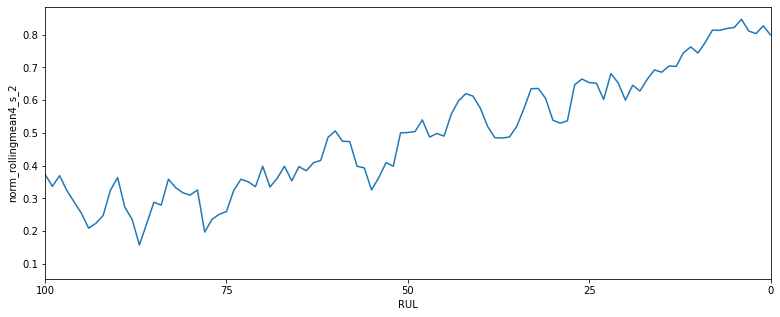

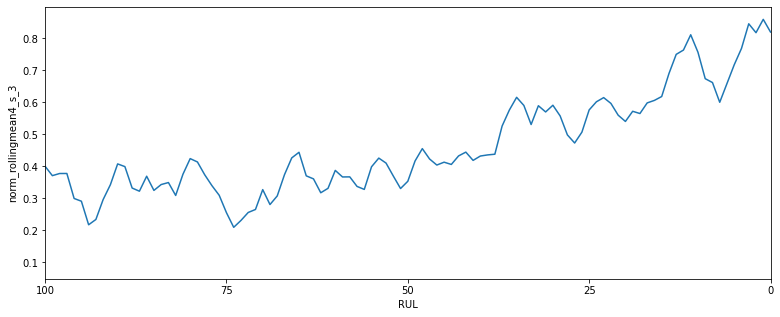

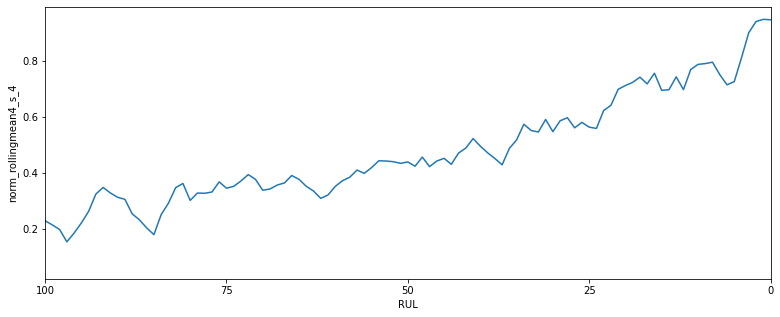

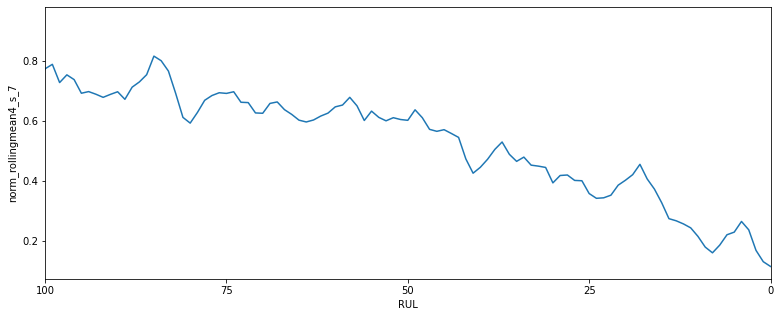

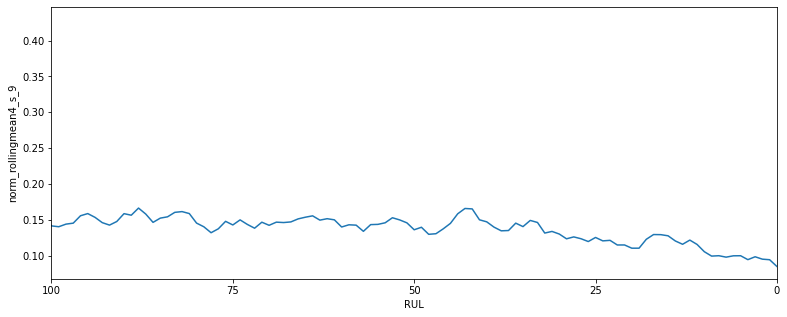

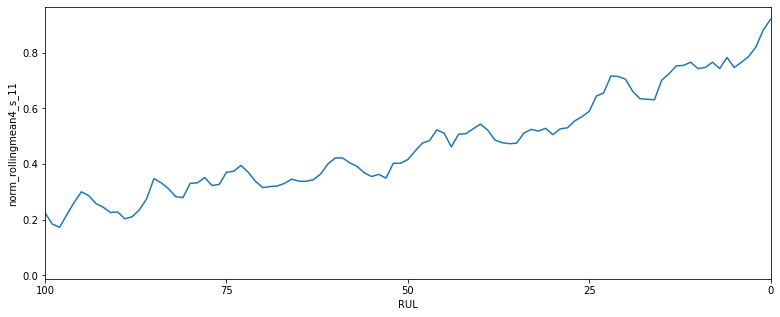

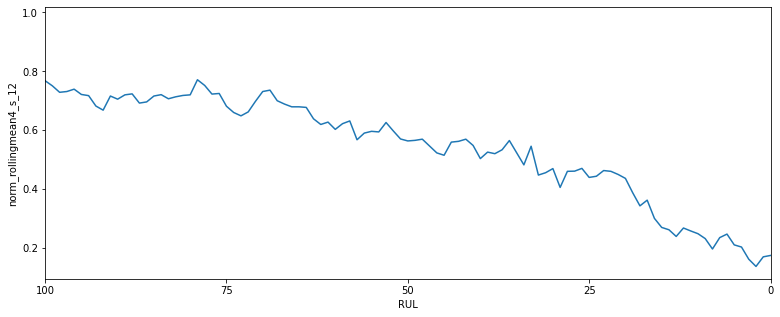

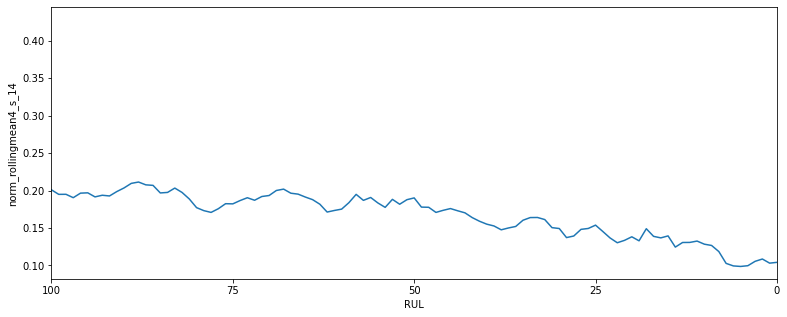

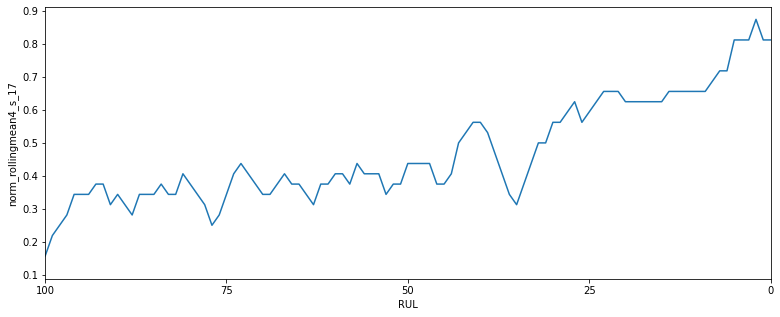

In [33]:
norm_rolling_sensor_names = ['norm_rollingmean4_{}'.format(i) for i in non_low_var] 

for sensor_name in norm_rolling_sensor_names:
    plot_sensor(train,sensor_name,100)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp_df=pd.DataFrame()
cols_scaled = rolling_sensor_names
scaled_train_df = pd.DataFrame(scaler.fit_transform(train[cols_scaled]), 
                            columns=cols_scaled, 
                            index=train.index)
for feature_name in rolling_sensor_names:
    temp_df['scaled_'+feature_name] = scaled_train_df[feature_name]
temp_df

scaled_rollingmean4_s_2  scaled_rollingmean4_s_3  \
0                    -2.052051                -0.165226   
1                    -1.658716                 0.047781   
2                    -1.368680                -0.137763   
3                    -1.223663                -0.491770   
4                    -0.895883                -0.835896   
...                        ...                      ...   
20626                 1.779988                 1.659398   
20627                 2.048172                 1.895012   
20628                 1.869383                 2.154739   
20629                 1.762110                 2.416979   
20630                 1.976656                 2.537549   

       scaled_rollingmean4_s_4  scaled_rollingmean4_s_7  \
0                    -1.022074                 1.242095   
1                    -0.866280                 0.860215   
2                    -0.771004                 0.945773   
3                    -0.794823                 1.048025   
4                    -0.622468                 0.935339   
...                        ...                      ...   
20626                 2.488506                -2.063351   
20627                 2.631113                -2.432709   
20628                 2.654727                -2.761376   
20629                 2.490039                -2.993008   
20630                 2.597685                -3.193338   

       scaled_rollingmean4_s_9  scaled_rollingmean4_s_11  \
0                    -0.889557                 -0.286958   
1                    -0.939051                 -0.246604   
2                    -0.817495                 -0.529077   
3                    -0.797106                 -0.811550   
4                    -0.692516                 -1.003228   
...                        ...                       ...   
20626                 0.124483                  2.457066   
20627                 0.095767                  2.305741   
20628                 0.061332                  2.275476   
20629                 0.108374                  2.446978   
20630                 0.061215                  2.578126   

       scaled_rollingmean4_s_12  scaled_rollingmean4_s_14  \
0                      0.362929                 -0.276208   
1                      0.819606                 -0.468057   
2                      1.040578                 -0.500794   
3                      1.313111                 -0.509090   
4                      1.508303                 -0.573937   
...                         ...                       ...   
20626                 -2.502346                 -0.172480   
20627                 -2.660710                 -0.246744   
20628                 -2.491298                 -0.228178   
20629                 -2.506029                 -0.276746   
20630                 -2.576004                 -0.280378   

       scaled_rollingmean4_s_17  
0                     -0.938402  
1                     -0.938402  
2                     -1.455276  
3                     -1.326058  
4                     -1.132230  
...                         ...  
20626                  1.775188  
20627                  1.387532  
20628                  2.162844  
20629                  2.356672  
20630                  2.162844  

[20631 rows x 9 columns]

In [35]:
train=pd.concat([train, temp_df], axis=1, join="inner")
train

id  time_cycles     s_2      s_3      s_4     s_7      s_9   s_11  \
0        1            1  641.82  1589.70  1400.60  554.36  9046.19  47.47   
1        1            2  642.15  1591.82  1403.14  553.75  9044.07  47.49   
2        1            3  642.35  1587.99  1404.20  554.26  9052.94  47.27   
3        1            4  642.35  1582.79  1401.87  554.45  9049.48  47.13   
4        1            5  642.37  1582.85  1406.22  554.00  9055.15  47.28   
...    ...          ...     ...      ...      ...     ...      ...    ...   
20626  100          196  643.49  1597.98  1428.63  551.43  9065.52  48.07   
20627  100          197  643.54  1604.50  1433.58  550.86  9065.11  48.04   
20628  100          198  643.42  1602.46  1428.18  550.94  9065.90  48.09   
20629  100          199  643.23  1605.26  1426.53  550.68  9073.72  48.39   
20630  100          200  643.85  1600.38  1432.14  550.79  9061.48  48.20   

         s_12     s_14  ...  norm_rollingmean4_s_17  scaled_rollingmean4_s_2  \
0      521.66  8138.62  ...                0.281250                -2.052051   
1      522.28  8131.49  ...                0.281250                -1.658716   
2      522.42  8133.23  ...                0.197917                -1.368680   
3      522.86  8133.83  ...                0.218750                -1.223663   
4      522.19  8133.80  ...                0.250000                -0.895883   
...       ...      ...  ...                     ...                      ...   
20626  519.49  8137.60  ...                0.718750                 1.779988   
20627  519.68  8136.50  ...                0.656250                 2.048172   
20628  520.01  8141.05  ...                0.781250                 1.869383   
20629  519.67  8139.29  ...                0.812500                 1.762110   
20630  519.30  8137.33  ...                0.781250                 1.976656   

       scaled_rollingmean4_s_3  scaled_rollingmean4_s_4  \
0                    -0.165226                -1.022074   
1                     0.047781                -0.866280   
2                    -0.137763                -0.771004   
3                    -0.491770                -0.794823   
4                    -0.835896                -0.622468   
...                        ...                      ...   
20626                 1.659398                 2.488506   
20627                 1.895012                 2.631113   
20628                 2.154739                 2.654727   
20629                 2.416979                 2.490039   
20630                 2.537549                 2.597685   

       scaled_rollingmean4_s_7  scaled_rollingmean4_s_9  \
0                     1.242095                -0.889557   
1                     0.860215                -0.939051   
2                     0.945773                -0.817495   
3                     1.048025                -0.797106   
4                     0.935339                -0.692516   
...                        ...                      ...   
20626                -2.063351                 0.124483   
20627                -2.432709                 0.095767   
20628                -2.761376                 0.061332   
20629                -2.993008                 0.108374   
20630                -3.193338                 0.061215   

       scaled_rollingmean4_s_11  scaled_rollingmean4_s_12  \
0                     -0.286958                  0.362929   
1                     -0.246604                  0.819606   
2                     -0.529077                  1.040578   
3                     -0.811550                  1.313111   
4                     -1.003228                  1.508303   
...                         ...                       ...   
20626                  2.457066                 -2.502346   
20627                  2.305741                 -2.660710   
20628                  2.275476                 -2.491298   
20629                  2.446978                 -2.506029   
20630                  2.578126  

In [36]:
temp_df=pd.DataFrame()
cols_scaled = rolling_sensor_names
scaled_test_df = pd.DataFrame(scaler.transform(test[cols_scaled]), 
                            columns=cols_scaled, 
                            index=test.index)
for feature_name in rolling_sensor_names:
    temp_df['scaled_'+feature_name] = scaled_test_df[feature_name]
temp_df

scaled_rollingmean4_s_2  scaled_rollingmean4_s_3  \
0                     0.808569                -1.051415   
1                    -0.752852                -0.733914   
2                    -0.677364                -0.729225   
3                    -0.651539                -0.868550   
4                    -0.955480                -0.773099   
...                        ...                      ...   
13091                 0.945641                 1.038965   
13092                 1.124430                 1.347926   
13093                 1.356855                 1.095231   
13094                 1.452209                 1.064587   
13095                 1.279380                 1.173602   

       scaled_rollingmean4_s_4  scaled_rollingmean4_s_7  \
0                    -1.315261                 0.666146   
1                    -1.486389                 1.260876   
2                    -1.301358                 1.150277   
3                    -1.053049                 1.082457   
4                    -0.939270                 1.163841   
...                        ...                      ...   
13091                 0.825374                -0.150825   
13092                 1.082986                -0.157085   
13093                 0.722329                -0.194647   
13094                 0.867696                -0.135174   
13095                 1.149843                -0.426279   

       scaled_rollingmean4_s_9  scaled_rollingmean4_s_11  \
0                    -0.703722                 -1.376496   
1                    -0.604501                 -0.771197   
2                    -0.531894                 -0.569431   
3                    -0.631816                 -0.690490   
4                    -0.697418                 -0.579519   
...                        ...                       ...   
13091                 3.494851                  0.288077   
13092                 3.547263                  0.277989   
13093                 3.604344                  0.277989   
13094                 3.709052                  0.308253   
13095                 3.856833                  0.419225   

       scaled_rollingmean4_s_12  scaled_rollingmean4_s_14  \
0                      0.451318                 -0.979564   
1                      0.775411                 -0.600979   
2                      0.790143                 -0.645555   
3                      0.580219                 -0.630173   
4                      0.738582                 -0.576493   
...                         ...                       ...   
13091                 -0.506229                  3.552025   
13092                 -0.572521                  3.671897   
13093                 -0.502546                  3.766072   
13094                 -0.517277                  3.859037   
13095                 -0.377328                  3.877334   

       scaled_rollingmean4_s_17  
0                     -0.938402  
1                     -0.550746  
2                     -0.421528  
3                     -0.744574  
4                     -1.132230  
...                         ...  
13091                  1.387532  
13092                  1.193705  
13093                  1.193705  
13094                  1.193705  
13095                  1.581360  

[13096 rows x 9 columns]

In [37]:
test=pd.concat([test, temp_df], axis=1, join="inner")
test

id  time_cycles     s_2      s_3      s_4     s_7      s_9   s_11  \
0        1            1  643.02  1585.29  1398.21  553.90  9050.17  47.20   
1        1            2  641.71  1588.45  1395.42  554.85  9054.42  47.50   
2        1            3  642.46  1586.94  1401.34  554.11  9056.96  47.50   
3        1            4  642.44  1584.12  1406.42  554.07  9045.29  47.28   
4        1            5  642.51  1587.19  1401.92  554.16  9044.55  47.31   
...    ...          ...     ...      ...      ...     ...      ...    ...   
13091  100          194  643.24  1599.45  1415.79  553.41  9142.37  47.69   
13092  100          195  643.22  1595.69  1422.05  553.22  9140.68  47.60   
13093  100          196  643.44  1593.15  1406.82  553.04  9146.81  47.57   
13094  100          197  643.26  1594.99  1419.36  553.37  9148.85  47.61   
13095  100          198  642.95  1601.62  1424.99  552.48  9155.03  47.80   

         s_12     s_14  ...  norm_rollingmean4_s_17  scaled_rollingmean4_s_2  \
0      521.72  8125.55  ...                0.281250                 0.808569   
1      522.16  8139.62  ...                0.343750                -0.752852   
2      521.97  8130.10  ...                0.364583                -0.677364   
3      521.38  8132.90  ...                0.312500                -0.651539   
4      522.15  8129.54  ...                0.250000                -0.955480   
...       ...      ...  ...                     ...                      ...   
13091  520.69  8213.28  ...                0.656250                 0.945641   
13092  521.05  8210.85  ...                0.625000                 1.124430   
13093  521.18  8217.24  ...                0.625000                 1.356855   
13094  521.33  8220.48  ...                0.625000                 1.452209   
13095  521.07  8214.64  ...                0.687500                 1.279380   

       scaled_rollingmean4_s_3  scaled_rollingmean4_s_4  \
0                    -1.051415                -1.315261   
1                    -0.733914                -1.486389   
2                    -0.729225                -1.301358   
3                    -0.868550                -1.053049   
4                    -0.773099                -0.939270   
...                        ...                      ...   
13091                 1.038965                 0.825374   
13092                 1.347926                 1.082986   
13093                 1.095231                 0.722329   
13094                 1.064587                 0.867696   
13095                 1.173602                 1.149843   

       scaled_rollingmean4_s_7  scaled_rollingmean4_s_9  \
0                     0.666146                -0.703722   
1                     1.260876                -0.604501   
2                     1.150277                -0.531894   
3                     1.082457                -0.631816   
4                     1.163841                -0.697418   
...                        ...                      ...   
13091                -0.150825                 3.494851   
13092                -0.157085                 3.547263   
13093                -0.194647                 3.604344   
13094                -0.135174                 3.709052   
13095                -0.426279                 3.856833   

       scaled_rollingmean4_s_11  scaled_rollingmean4_s_12  \
0                     -1.376496                  0.451318   
1                     -0.771197                  0.775411   
2                     -0.569431                  0.790143   
3                     -0.690490                  0.580219   
4                     -0.579519                  0.738582   
...                         ...                       ...   
13091                  0.288077                 -0.506229   
13092                  0.277989                 -0.572521   
13093                  0.277989                 -0.502546   
13094                  0.308253                 -0.517277   
13095                  0.419225  

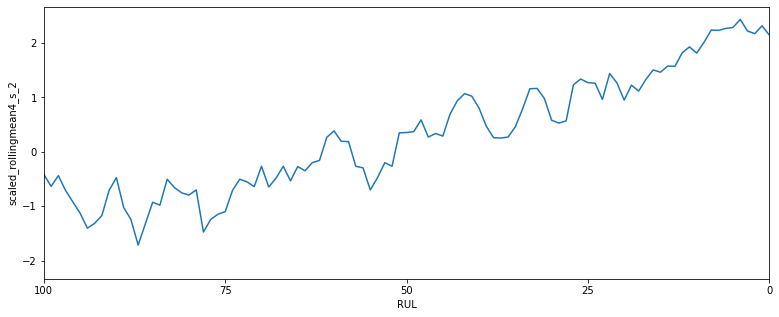

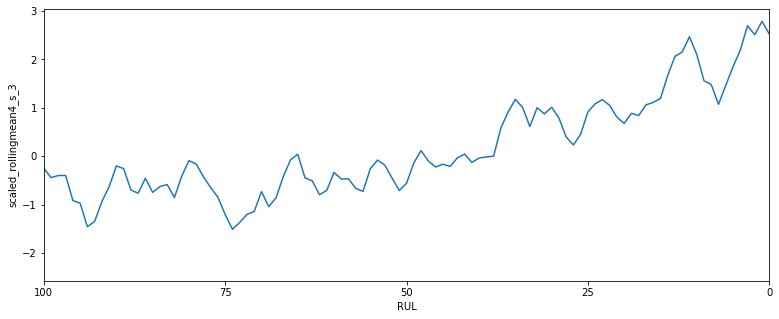

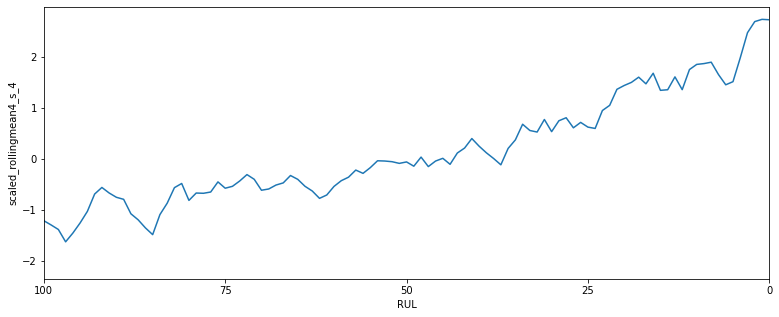

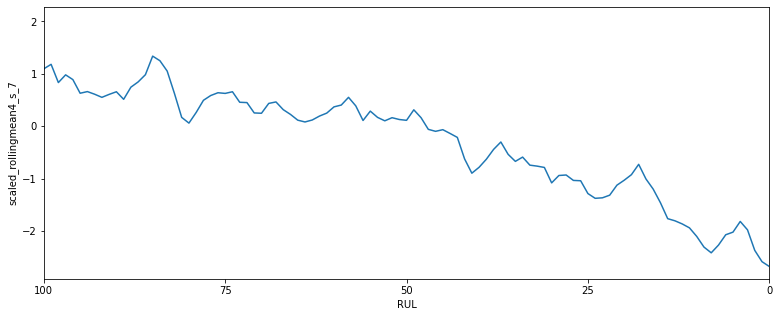

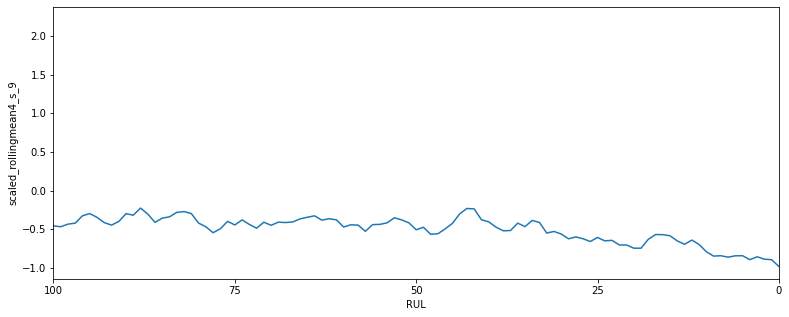

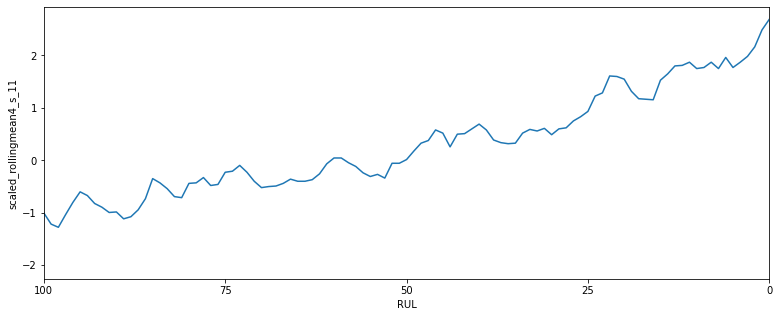

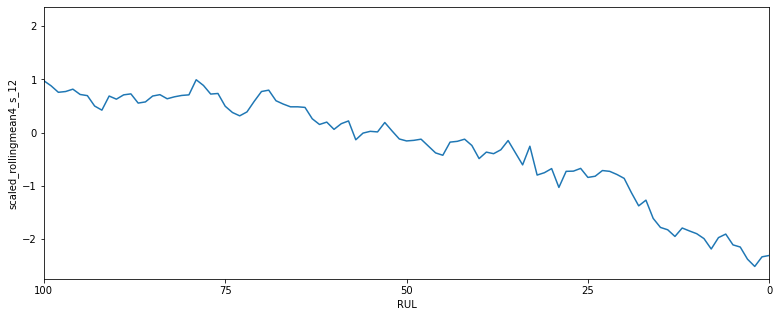

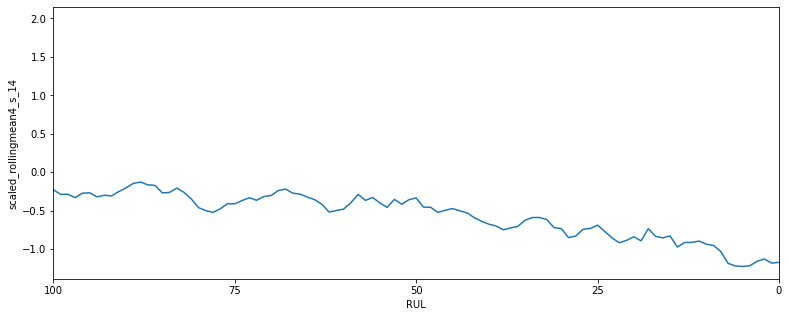

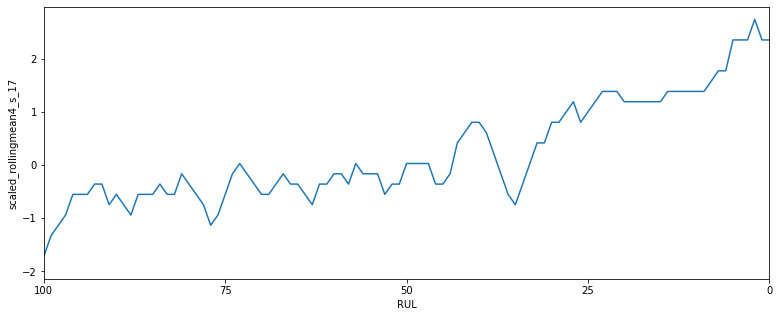

In [38]:
scaled_rolling_sensor_names = ['scaled_rollingmean4_{}'.format(i) for i in non_low_var] 

for sensor_name in scaled_rolling_sensor_names:
    plot_sensor(train,sensor_name,100)

In [39]:
train.shape

(20631, 41)

In [40]:
from sklearn.decomposition import PCA

In [41]:
train.dropna(subset  = ["norm_rollingmean4_s_2"], inplace=True)

In [42]:
test.dropna(subset  = ["norm_rollingmean4_s_2"], inplace=True)

In [43]:
train.head()

id  time_cycles     s_2      s_3      s_4     s_7      s_9   s_11    s_12  \
0   1            1  641.82  1589.70  1400.60  554.36  9046.19  47.47  521.66   
1   1            2  642.15  1591.82  1403.14  553.75  9044.07  47.49  522.28   
2   1            3  642.35  1587.99  1404.20  554.26  9052.94  47.27  522.42   
3   1            4  642.35  1582.79  1401.87  554.45  9049.48  47.13  522.86   
4   1            5  642.37  1582.85  1406.22  554.00  9055.15  47.28  522.19   

      s_14  ...  norm_rollingmean4_s_17  scaled_rollingmean4_s_2  \
0  8138.62  ...                0.281250                -2.052051   
1  8131.49  ...                0.281250                -1.658716   
2  8133.23  ...                0.197917                -1.368680   
3  8133.83  ...                0.218750                -1.223663   
4  8133.80  ...                0.250000                -0.895883   

   scaled_rollingmean4_s_3  scaled_rollingmean4_s_4  scaled_rollingmean4_s_7  \
0                -0.165226                -1.022074                 1.242095   
1                 0.047781                -0.866280                 0.860215   
2                -0.137763                -0.771004                 0.945773   
3                -0.491770                -0.794823                 1.048025   
4                -0.835896                -0.622468                 0.935339   

   scaled_rollingmean4_s_9  scaled_rollingmean4_s_11  \
0                -0.889557                 -0.286958   
1                -0.939051                 -0.246604   
2                -0.817495                 -0.529077   
3                -0.797106                 -0.811550   
4                -0.692516                 -1.003228   

   scaled_rollingmean4_s_12  scaled_rollingmean4_s_14  \
0                  0.362929                 -0.276208   
1                  0.819606                 -0.468057   
2                  1.040578                 -0.500794   
3                  1.313111                 -0.509090   
4                  1.508303                 -0.573937   

   scaled_rollingmean4_s_17  
0                 -0.938402  
1                 -0.938402  
2                 -1.455276  
3                 -1.326058  
4                 -1.132230  

[5 rows x 41 columns]

In [44]:
scaled_train_df=pd.DataFrame()
for i in non_low_var:
    scaled_train_df['rollingmean4_{}'.format(i)]=train['rollingmean4_{}'.format(i)]
for i in non_low_var:
    scaled_train_df['norm_rollingmean4_{}'.format(i)]=train['norm_rollingmean4_{}'.format(i)]
for i in non_low_var:
    scaled_train_df['scaled_rollingmean4_{}'.format(i)]=train['scaled_rollingmean4_{}'.format(i)]       
scaled_train_df.head()    

rollingmean4_s_2  rollingmean4_s_3  rollingmean4_s_4  rollingmean4_s_7  \
0        641.820000       1589.700000       1400.600000        554.360000   
1        641.985000       1590.760000       1401.870000        554.055000   
2        642.106667       1589.836667       1402.646667        554.123333   
3        642.167500       1588.075000       1402.452500        554.205000   
4        642.305000       1586.362500       1403.857500        554.115000   

   rollingmean4_s_9  rollingmean4_s_11  rollingmean4_s_12  rollingmean4_s_14  \
0       9046.190000            47.4700           521.6600        8138.620000   
1       9045.130000            47.4800           521.9700        8135.055000   
2       9047.733333            47.4100           522.1200        8134.446667   
3       9048.170000            47.3400           522.3050        8134.292500   
4       9050.410000            47.2925           522.4375        8133.087500   

   rollingmean4_s_17  norm_rollingmean4_s_2  ...  norm_rollingmean4_s_17  \
0         392.000000               0.100990  ...                0.281250   
1         392.000000               0.166337  ...                0.281250   
2         391.333333               0.214521  ...                0.197917   
3         391.500000               0.238614  ...                0.218750   
4         391.750000               0.293069  ...                0.250000   

   scaled_rollingmean4_s_2  scaled_rollingmean4_s_3  scaled_rollingmean4_s_4  \
0                -2.052051                -0.165226                -1.022074   
1                -1.658716                 0.047781                -0.866280   
2                -1.368680                -0.137763                -0.771004   
3                -1.223663                -0.491770                -0.794823   
4                -0.895883                -0.835896                -0.622468   

   scaled_rollingmean4_s_7  scaled_rollingmean4_s_9  scaled_rollingmean4_s_11  \
0                 1.242095                -0.889557                 -0.286958   
1                 0.860215                -0.939051                 -0.246604   
2                 0.945773                -0.817495                 -0.529077   
3                 1.048025                -0.797106                 -0.811550   
4                 0.935339                -0.692516                 -1.003228   

   scaled_rollingmean4_s_12  scaled_rollingmean4_s_14  \
0                  0.362929                 -0.276208   
1                  0.819606                 -0.468057   
2                  1.040578                 -0.500794   
3                  1.313111                 -0.509090   
4                  1.508303                 -0.573937   

   scaled_rollingmean4_s_17  
0                 -0.938402  
1                 -0.938402  
2                 -1.455276  
3                 -1.326058  
4                 -1.132230  

[5 rows x 27 columns]

In [45]:
scaled_test_df=pd.DataFrame()
for i in non_low_var:
    scaled_test_df['rollingmean4_{}'.format(i)]=test['rollingmean4_{}'.format(i)]  
for i in non_low_var:
    scaled_test_df['norm_rollingmean4_{}'.format(i)]=test['norm_rollingmean4_{}'.format(i)]  
for i in non_low_var:
    scaled_test_df['scaled_rollingmean4_{}'.format(i)]=test['scaled_rollingmean4_{}'.format(i)]        
scaled_test_df.head() 

rollingmean4_s_2  rollingmean4_s_3  rollingmean4_s_4  rollingmean4_s_7  \
0        643.020000       1585.290000       1398.210000        553.900000   
1        642.365000       1586.870000       1396.815000        554.375000   
2        642.396667       1586.893333       1398.323333        554.286667   
3        642.407500       1586.200000       1400.347500        554.232500   
4        642.280000       1586.675000       1401.275000        554.297500   

   rollingmean4_s_9  rollingmean4_s_11  rollingmean4_s_12  rollingmean4_s_14  \
0          9050.170            47.2000           521.7200        8125.550000   
1          9052.295            47.3500           521.9400        8132.585000   
2          9053.850            47.4000           521.9500        8131.756667   
3          9051.710            47.3700           521.8075        8132.042500   
4          9050.305            47.3975           521.9150        8133.040000   

   rollingmean4_s_17  norm_rollingmean4_s_2  ...  norm_rollingmean4_s_17  \
0         392.000000               0.576238  ...                0.281250   
1         392.500000               0.316832  ...                0.343750   
2         392.666667               0.329373  ...                0.364583   
3         392.250000               0.333663  ...                0.312500   
4         391.750000               0.283168  ...                0.250000   

   scaled_rollingmean4_s_2  scaled_rollingmean4_s_3  scaled_rollingmean4_s_4  \
0                 0.808569                -1.051415                -1.315261   
1                -0.752852                -0.733914                -1.486389   
2                -0.677364                -0.729225                -1.301358   
3                -0.651539                -0.868550                -1.053049   
4                -0.955480                -0.773099                -0.939270   

   scaled_rollingmean4_s_7  scaled_rollingmean4_s_9  scaled_rollingmean4_s_11  \
0                 0.666146                -0.703722                 -1.376496   
1                 1.260876                -0.604501                 -0.771197   
2                 1.150277                -0.531894                 -0.569431   
3                 1.082457                -0.631816                 -0.690490   
4                 1.163841                -0.697418                 -0.579519   

   scaled_rollingmean4_s_12  scaled_rollingmean4_s_14  \
0                  0.451318                 -0.979564   
1                  0.775411                 -0.600979   
2                  0.790143                 -0.645555   
3                  0.580219                 -0.630173   
4                  0.738582                 -0.576493   

   scaled_rollingmean4_s_17  
0                 -0.938402  
1                 -0.550746  
2                 -0.421528  
3                 -0.744574  
4                 -1.132230  

[5 rows x 27 columns]

In [46]:
scaled_test_df.shape

(13096, 27)

In [47]:
train_pca = PCA(n_components=9)
train_x_pca=train_pca.fit(scaled_train_df).transform(scaled_train_df)
train_x_pca.shape

(20631, 9)

In [48]:
test_pca = PCA(n_components=9)
test_x_pca=test_pca.fit(scaled_test_df).transform(scaled_test_df)
test_x_pca.shape

(13096, 9)

In [49]:
new_df=pd.DataFrame()
new_df=test_x_pca

In [50]:
train_pca_variances=train_pca.explained_variance_
print(train_pca_variances)
train_pca_variance_ratio=train_pca.explained_variance_ratio_
print(train_pca_variance_ratio)
train_pca_explained_variance_ratio=train_pca.explained_variance_ratio_.cumsum()
print(train_pca_explained_variance_ratio)

[8.09261740e+02 8.98918643e+01 4.11022099e+00 3.17130630e+00
 5.26623501e-01 2.32657381e-01 1.38422524e-01 8.85854159e-02
 5.14961695e-02]
[8.91775088e-01 9.90573522e-02 4.52930431e-03 3.49465670e-03
 5.80318697e-04 2.56379421e-04 1.52536260e-04 9.76176966e-05
 5.67467839e-05]
[0.89177509 0.99083244 0.99536174 0.9988564  0.99943672 0.9996931
 0.99984564 0.99994325 1.        ]


In [51]:
test_pca_variances=test_pca.explained_variance_
print(test_pca_variances)
test_pca_variance_ratio=test_pca.explained_variance_ratio_
print(test_pca_variance_ratio)
test_pca_explained_variance_ratio=test_pca.explained_variance_ratio_.cumsum()
print(test_pca_explained_variance_ratio)

[2.04769506e+02 4.57251898e+01 4.20249669e+00 3.04947094e+00
 4.99981228e-01 2.34891716e-01 1.35852159e-01 8.52031906e-02
 5.39510847e-02]
[7.91359723e-01 1.76711241e-01 1.62411224e-02 1.17850970e-02
 1.93224574e-03 9.07771117e-04 5.25019223e-04 3.29279367e-04
 2.08501336e-04]
[0.79135972 0.96807096 0.98431209 0.99609718 0.99802943 0.9989372
 0.99946222 0.9997915  1.        ]


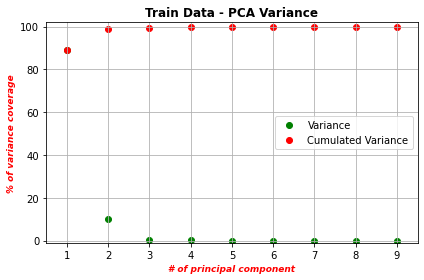

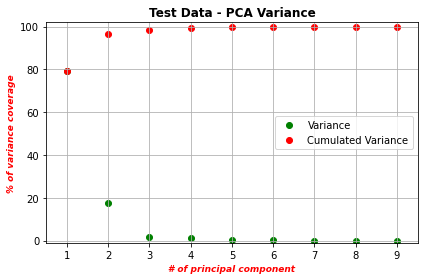

In [52]:
def plot_PCA(pca_variance,cum_pca, title, save_fig, file_name):
    n = len(pca_variance)
    plt.scatter(range(1,n+1),100*pca_variance, color= 'g', label='Variance')
    plt.scatter(range(1,n+1),100*cum_pca, color= 'r', label='Cumulated Variance')
    
    axes = plt.gca()
    axes.set_xlim([.5, n+.5])
    axes.set_ylim([-1, 102])
    axes.set_title(title, fontsize= 12, fontweight= 'bold')
    axes.set_xlabel('# of principal component', fontsize= 9, fontweight= 'bold', style= 'italic', color= 'r')
    axes.set_ylabel('% of variance coverage', fontsize= 9, fontweight= 'bold', style= 'italic', color= 'r')
    axes.legend(ncol=1, loc=7)
    axes.grid()
    
    plt.tight_layout()
    
    if save_fig:
        plt.savefig(file_name)
        
    plt.show()  
    
plot_PCA(train_pca_variance_ratio,train_pca_explained_variance_ratio, 'Train Data - PCA Variance', False, '')
plot_PCA(test_pca_variance_ratio,test_pca_explained_variance_ratio, 'Test Data - PCA Variance', False, '')


In [53]:
PCA_train_df=pd.DataFrame(train_x_pca,columns=['PCA_{}'.format(i) for i in range(1,10)])
PCA_test_df=pd.DataFrame(test_x_pca,columns=['PCA_{}'.format(i) for i in range(1,10)])

In [54]:
PCA_train_df.head(100)

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0  -18.559902 -7.629596 -4.531158  6.763281 -0.165307  0.455421  0.958855   
1  -21.483808 -5.315774 -4.696624  5.153236 -0.529161  0.443531  0.714617   
2  -19.933862 -5.041629 -3.215713  3.215649 -1.483865  0.137875  0.344808   
3  -19.843714 -6.017566 -1.681406  2.798198 -1.206377  0.304109  0.037688   
4  -18.923988 -5.263016  0.811285  0.814750 -1.113053  0.442466 -0.288562   
..        ...       ...       ...       ...       ...       ...       ...   
95 -21.591350 -4.696349  2.551414  1.871421  0.815458 -0.248267 -0.225930   
96 -22.625009 -4.406212  2.066918  1.317715  0.682817 -0.005973  0.281782   
97 -23.312158 -3.440372  0.354302  0.516240 -0.156827 -0.092187  0.689251   
98 -23.823488 -2.564746 -3.580426  0.871331 -0.634922 -0.119305  0.981685   
99 -23.641613  1.287926 -3.022819  2.614052 -1.608846  0.392897  0.682611   

       PCA_8     PCA_9  
0   1.123571 -0.554793  
1   0.287389 -0.651128  
2   0.035829 -0.488343  
3  -0.219597 -0.354706  
4  -0.623470 -0.175870  
..       ...       ...  
95  0.145416 -0.005758  
96 -0.022552 -0.035343  
97 -0.508760  0.000650  
98 -0.328088  0.049790  
99 -0.124597 -0.162997  

[100 rows x 9 columns]

In [55]:
PCA_test_df.head()

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -14.980062 -6.223358 -0.878813 -5.834992  0.712361  1.386954  1.180657   
1  -8.628487 -7.425867 -2.900880 -2.195107  1.073130 -0.021180  0.329402   
2  -8.061903 -5.757828 -2.163717 -3.543615  0.920958 -0.162325  0.354479   
3  -9.509169 -4.777012 -0.594506 -1.619006  0.340482  0.096122  0.248407   
4  -9.896847 -4.255422 -0.588477  0.263106 -0.433154  0.070984  0.035115   

      PCA_8     PCA_9  
0  0.109150  0.805360  
1 -0.421829 -0.184226  
2 -0.311904 -0.320693  
3 -0.432010 -0.093375  
4 -0.426520 -0.323284

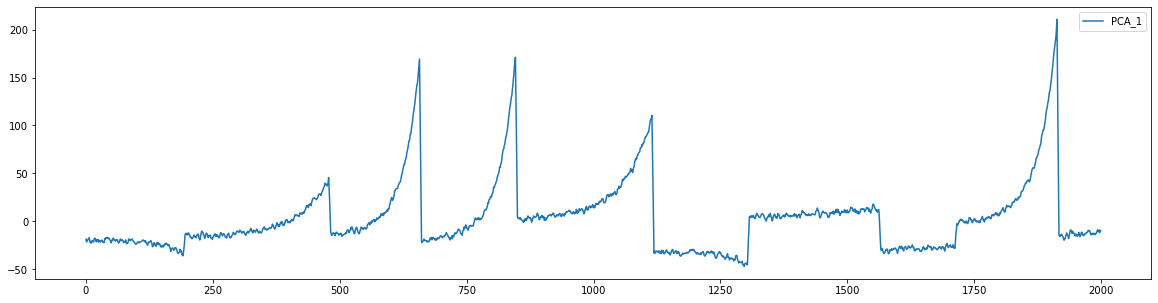

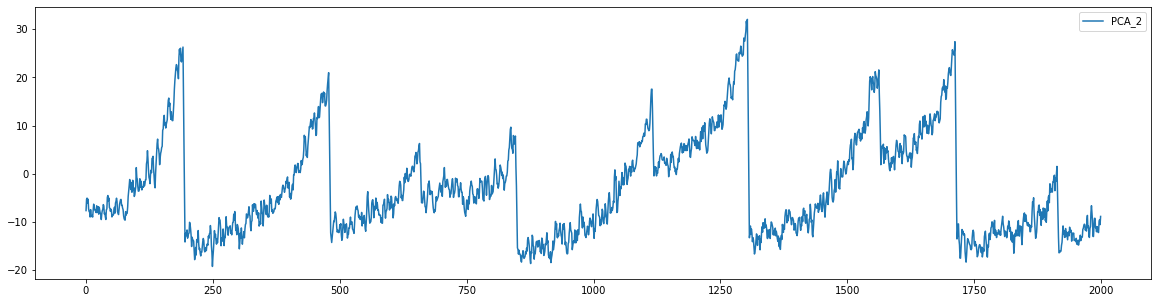

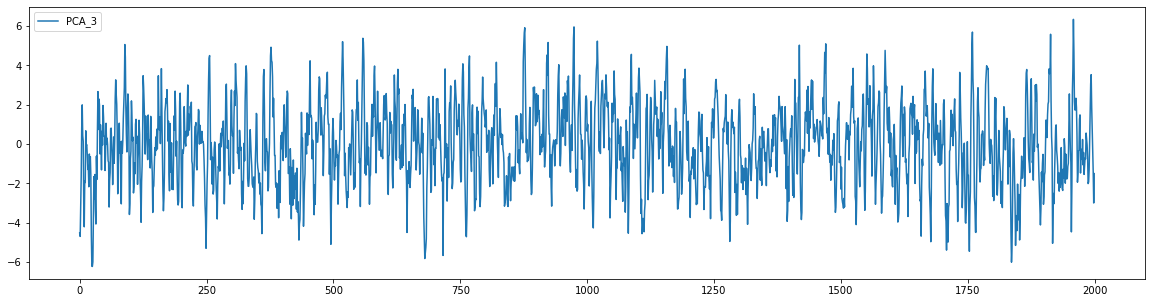

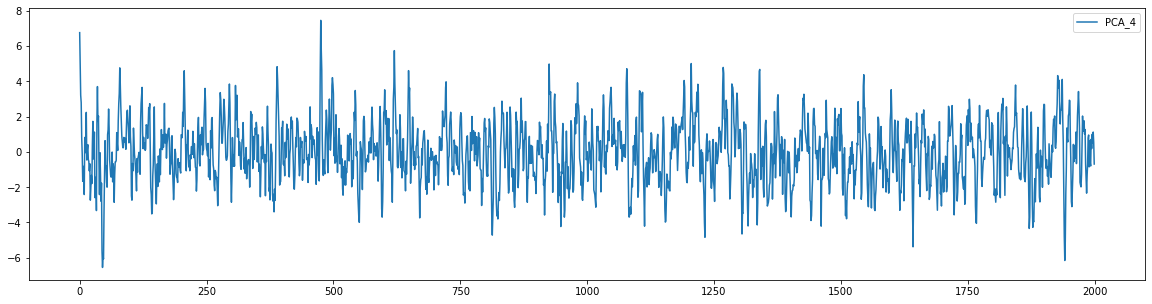

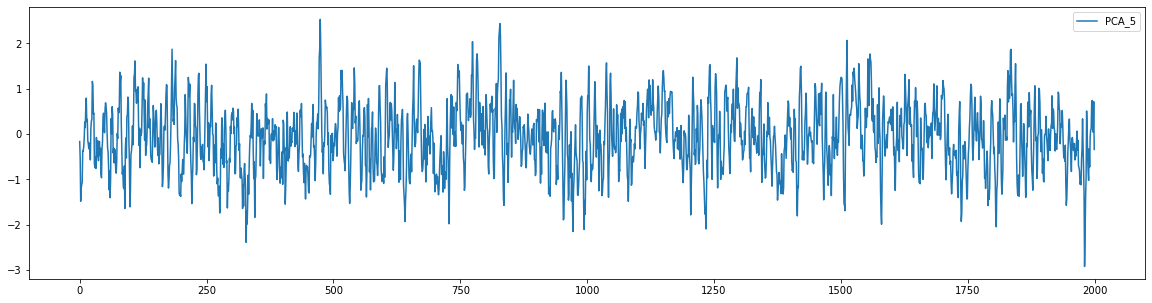

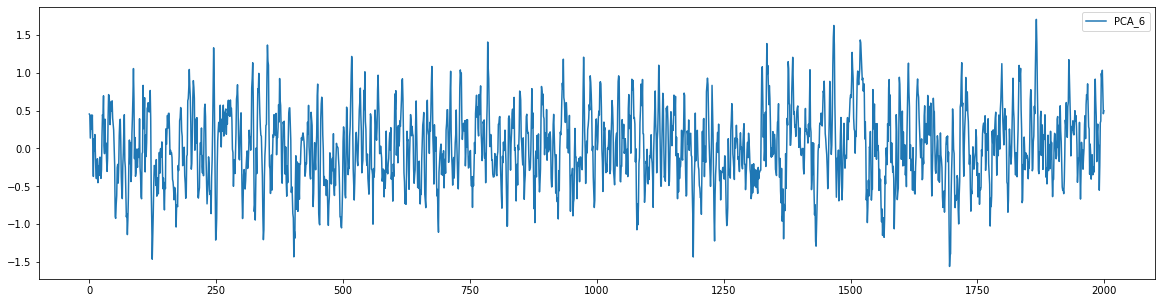

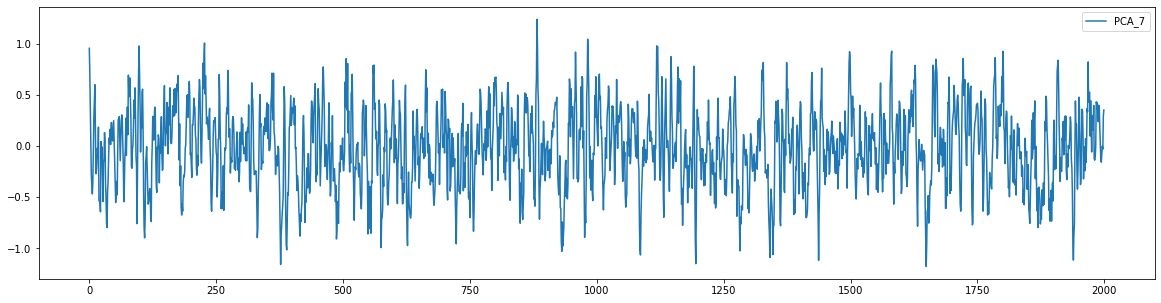

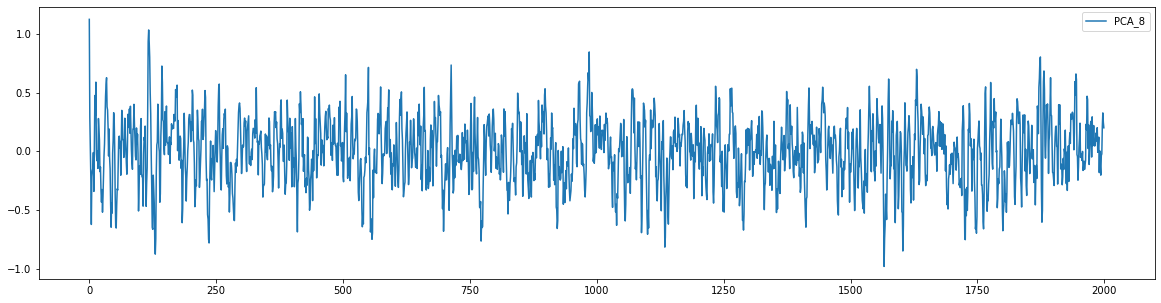

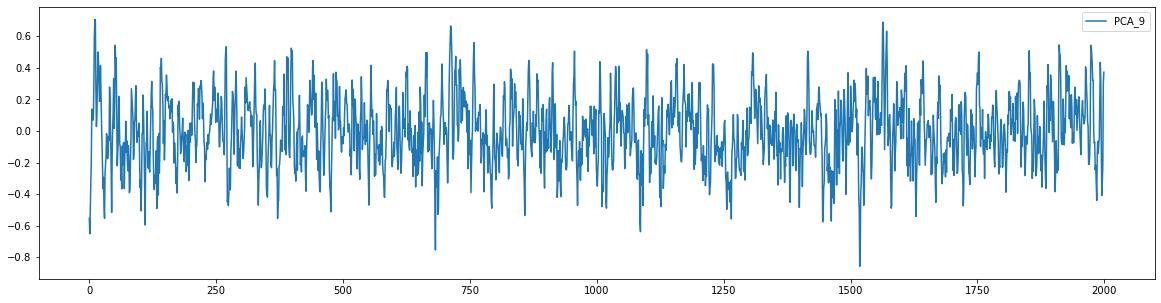

In [56]:
PCA_features=['PCA_{}'.format(i) for i in range(1,10)]
for i in PCA_features:
    PCA_train_df.iloc[:2000].plot( y=[i],figsize=(20, 5))

In [57]:
min_max_scaler = preprocessing.MinMaxScaler()

temp_df=pd.DataFrame()
cols_normalize = PCA_features
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(PCA_train_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=PCA_train_df.index)
for feature_name in PCA_features:
    temp_df['norm_'+feature_name] = norm_train_df[feature_name]
temp_df

norm_PCA_1  norm_PCA_2  norm_PCA_3  norm_PCA_4  norm_PCA_5  norm_PCA_6  \
0        0.123795    0.235997    0.177008    0.951423    0.465739    0.574863   
1        0.112840    0.280536    0.165970    0.839177    0.404302    0.571902   
2        0.118647    0.285813    0.264756    0.704097    0.243100    0.495768   
3        0.118985    0.267027    0.367104    0.674994    0.289954    0.537174   
4        0.122431    0.281552    0.533383    0.536717    0.305711    0.571636   
...           ...         ...         ...         ...         ...         ...   
20626    0.202513    0.825114    0.656618    0.515715    0.416904    0.450915   
20627    0.198083    0.859508    0.626773    0.491604    0.294473    0.318505   
20628    0.197341    0.875870    0.549169    0.544515    0.452433    0.496562   
20629    0.197918    0.872619    0.440218    0.430166    0.520181    0.503085   
20630    0.195349    0.892145    0.426146    0.486106    0.468476    0.409484   

       norm_PCA_7  norm_PCA_8  norm_PCA_9  
0        0.778544    0.975277    0.173945  
1        0.695983    0.606702    0.118670  
2        0.570975    0.495818    0.212072  
3        0.467157    0.383230    0.288750  
4        0.356873    0.205210    0.391362  
...           ...         ...         ...  
20626    0.541842    0.684193    0.394532  
20627    0.565259    0.587185    0.577918  
20628    0.644474    0.397773    0.614235  
20629    0.738848    0.348266    0.550273  
20630    0.740868    0.304307    0.532137  

[20631 rows x 9 columns]

In [58]:
PCA_train_df=pd.concat([PCA_train_df, temp_df], axis=1, join="inner")
PCA_train_df

PCA_1      PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0     -18.559902  -7.629596 -4.531158  6.763281 -0.165307  0.455421  0.958855   
1     -21.483808  -5.315774 -4.696624  5.153236 -0.529161  0.443531  0.714617   
2     -19.933862  -5.041629 -3.215713  3.215649 -1.483865  0.137875  0.344808   
3     -19.843714  -6.017566 -1.681406  2.798198 -1.206377  0.304109  0.037688   
4     -18.923988  -5.263016  0.811285  0.814750 -1.113053  0.442466 -0.288562   
...          ...        ...       ...       ...       ...       ...       ...   
20626   2.449064  22.975259  2.658707  0.513500 -0.454528 -0.042199  0.258627   
20627   1.266774  24.762055  2.211310  0.167662 -1.179609 -0.573792  0.327900   
20628   1.068599  25.612056  1.047935  0.926616 -0.244112  0.141063  0.562241   
20629   1.222712  25.443148 -0.585347 -0.713608  0.157120  0.167249  0.841425   
20630   0.537127  26.457552 -0.796313  0.088789 -0.149097 -0.208535  0.847399   

          PCA_8     PCA_9  norm_PCA_1  norm_PCA_2  norm_PCA_3  norm_PCA_4  \
0      1.123571 -0.554793    0.123795    0.235997    0.177008    0.951423   
1      0.287389 -0.651128    0.112840    0.280536    0.165970    0.839177   
2      0.035829 -0.488343    0.118647    0.285813    0.264756    0.704097   
3     -0.219597 -0.354706    0.118985    0.267027    0.367104    0.674994   
4     -0.623470 -0.175870    0.122431    0.281552    0.533383    0.536717   
...         ...       ...         ...         ...         ...         ...   
20626  0.463192 -0.170345    0.202513    0.825114    0.656618    0.515715   
20627  0.243113  0.149267    0.198083    0.859508    0.626773    0.491604   
20628 -0.186605  0.212561    0.197341    0.875870    0.549169    0.544515   
20629 -0.298920  0.101086    0.197918    0.872619    0.440218    0.430166   
20630 -0.398649  0.069478    0.195349    0.892145    0.426146    0.486106   

       norm_PCA_5  norm_PCA_6  norm_PCA_7  norm_PCA_8  norm_PCA_9  
0        0.465739    0.574863    0.778544    0.975277    0.173945  
1        0.404302    0.571902    0.695983    0.606702    0.118670  
2        0.243100    0.495768    0.570975    0.495818    0.212072  
3        0.289954    0.537174    0.467157    0.383230    0.288750  
4        0.305711    0.571636    0.356873    0.205210    0.391362  
...           ...         ...         ...         ...         ...  
20626    0.416904    0.450915    0.541842    0.684193    0.394532  
20627    0.294473    0.318505    0.565259    0.587185    0.577918  
20628    0.452433    0.496562    0.644474    0.397773    0.614235  
20629    0.520181    0.503085    0.738848    0.348266    0.550273  
20630    0.468476    0.409484    0.740868    0.304307    0.532137  

[20631 rows x 18 columns]

In [59]:
temp_df=pd.DataFrame()
cols_normalize = PCA_features
norm_test_df = pd.DataFrame(min_max_scaler.transform(PCA_train_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=PCA_train_df.index)
for feature_name in PCA_features:
    temp_df['norm_'+feature_name] = norm_test_df[feature_name]
temp_df

norm_PCA_1  norm_PCA_2  norm_PCA_3  norm_PCA_4  norm_PCA_5  norm_PCA_6  \
0        0.123795    0.235997    0.177008    0.951423    0.465739    0.574863   
1        0.112840    0.280536    0.165970    0.839177    0.404302    0.571902   
2        0.118647    0.285813    0.264756    0.704097    0.243100    0.495768   
3        0.118985    0.267027    0.367104    0.674994    0.289954    0.537174   
4        0.122431    0.281552    0.533383    0.536717    0.305711    0.571636   
...           ...         ...         ...         ...         ...         ...   
20626    0.202513    0.825114    0.656618    0.515715    0.416904    0.450915   
20627    0.198083    0.859508    0.626773    0.491604    0.294473    0.318505   
20628    0.197341    0.875870    0.549169    0.544515    0.452433    0.496562   
20629    0.197918    0.872619    0.440218    0.430166    0.520181    0.503085   
20630    0.195349    0.892145    0.426146    0.486106    0.468476    0.409484   

       norm_PCA_7  norm_PCA_8  norm_PCA_9  
0        0.778544    0.975277    0.173945  
1        0.695983    0.606702    0.118670  
2        0.570975    0.495818    0.212072  
3        0.467157    0.383230    0.288750  
4        0.356873    0.205210    0.391362  
...           ...         ...         ...  
20626    0.541842    0.684193    0.394532  
20627    0.565259    0.587185    0.577918  
20628    0.644474    0.397773    0.614235  
20629    0.738848    0.348266    0.550273  
20630    0.740868    0.304307    0.532137  

[20631 rows x 9 columns]

In [60]:
PCA_test_df=pd.concat([PCA_test_df, temp_df], axis=1, join="inner")
PCA_test_df

PCA_1      PCA_2     PCA_3     PCA_4     PCA_5     PCA_6  \
0      -14.980062  -6.223358 -0.878813 -5.834992  0.712361  1.386954   
1       -8.628487  -7.425867 -2.900880 -2.195107  1.073130 -0.021180   
2       -8.061903  -5.757828 -2.163717 -3.543615  0.920958 -0.162325   
3       -9.509169  -4.777012 -0.594506 -1.619006  0.340482  0.096122   
4       -9.896847  -4.255422 -0.588477  0.263106 -0.433154  0.070984   
...           ...        ...       ...       ...       ...       ...   
13091  108.009956  15.723843  0.320496  0.792619  0.654295 -0.225588   
13092  110.305063  18.043411  0.001259  2.220607 -0.056432 -0.155969   
13093  112.437914  14.966490 -0.276873  2.029380  0.749057  0.370780   
13094  115.237357  15.975228  0.484217  2.025826  0.530269  0.323436   
13095  117.772464  18.653193  1.177185  0.665481  0.459949 -0.262357   

          PCA_7     PCA_8     PCA_9  norm_PCA_1  norm_PCA_2  norm_PCA_3  \
0      1.180657  0.109150  0.805360    0.123795    0.235997    0.177008   
1      0.329402 -0.421829 -0.184226    0.112840    0.280536    0.165970   
2      0.354479 -0.311904 -0.320693    0.118647    0.285813    0.264756   
3      0.248407 -0.432010 -0.093375    0.118985    0.267027    0.367104   
4      0.035115 -0.426520 -0.323284    0.122431    0.281552    0.533383   
...         ...       ...       ...         ...         ...         ...   
13091  0.419737 -0.252885  0.350641    0.208895    0.684673    0.535410   
13092  0.561501 -0.254877  0.430539    0.208927    0.664164    0.474679   
13093  0.637466 -0.190337  0.386573    0.214686    0.684157    0.299421   
13094  0.763886 -0.227906  0.375008    0.213248    0.682694    0.350011   
13095  0.570721  0.146322  0.313455    0.221187    0.684824    0.381783   

       norm_PCA_4  norm_PCA_5  norm_PCA_6  norm_PCA_7  norm_PCA_8  norm_PCA_9  
0        0.951423    0.465739    0.574863    0.778544    0.975277    0.173945  
1        0.839177    0.404302    0.571902    0.695983    0.606702    0.118670  
2        0.704097    0.243100    0.495768    0.570975    0.495818    0.212072  
3        0.674994    0.289954    0.537174    0.467157    0.383230    0.288750  
4        0.536717    0.305711    0.571636    0.356873    0.205210    0.391362  
...           ...         ...         ...         ...         ...         ...  
13091    0.427613    0.349301    0.471510    0.430532    0.611333    0.428619  
13092    0.484111    0.368544    0.336648    0.380805    0.510496    0.361365  
13093    0.442716    0.302322    0.255488    0.430612    0.566993    0.396445  
13094    0.581396    0.383000    0.224288    0.395884    0.567316    0.331012  
13095    0.522360    0.476046    0.253675    0.282108    0.387307    0.502917  

[13096 rows x 18 columns]

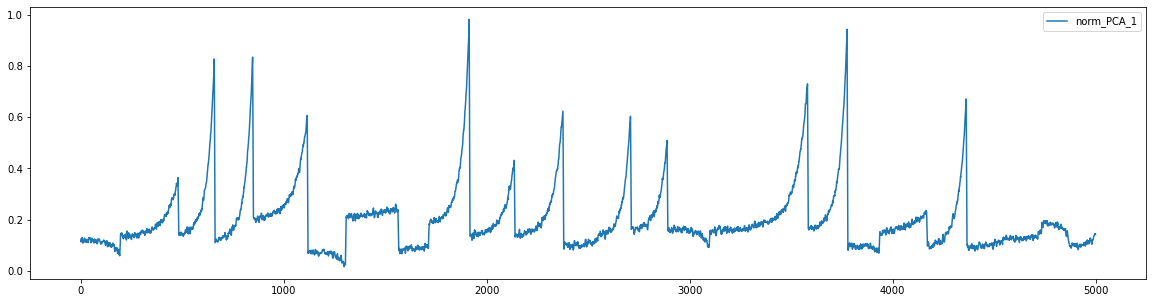

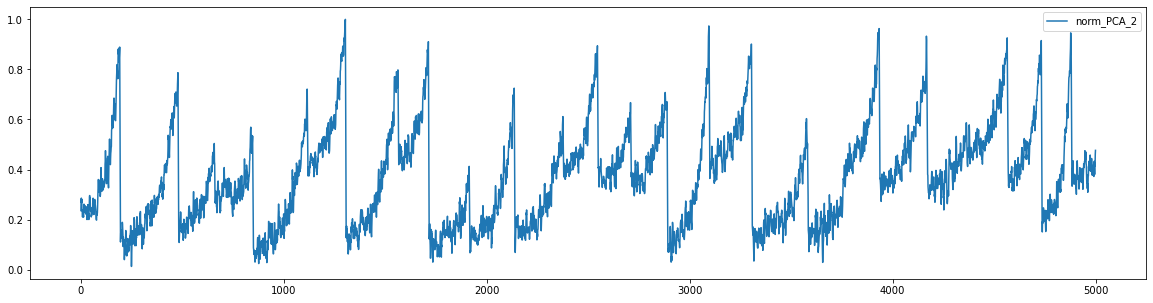

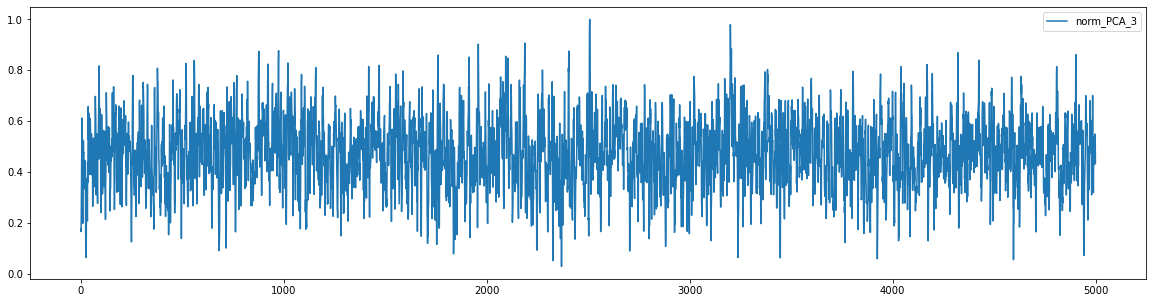

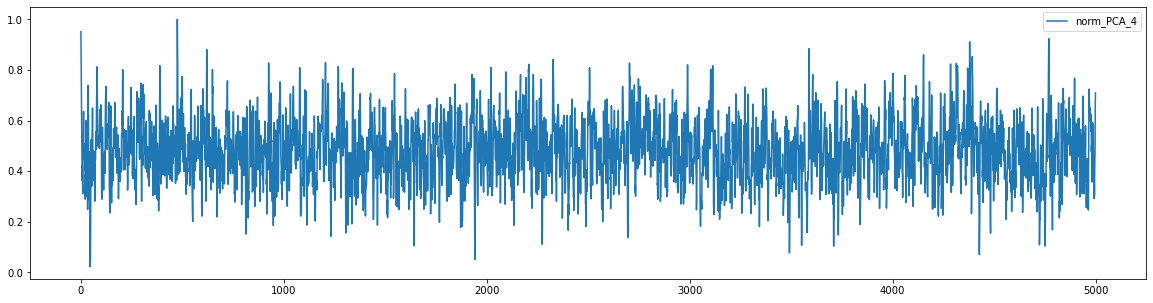

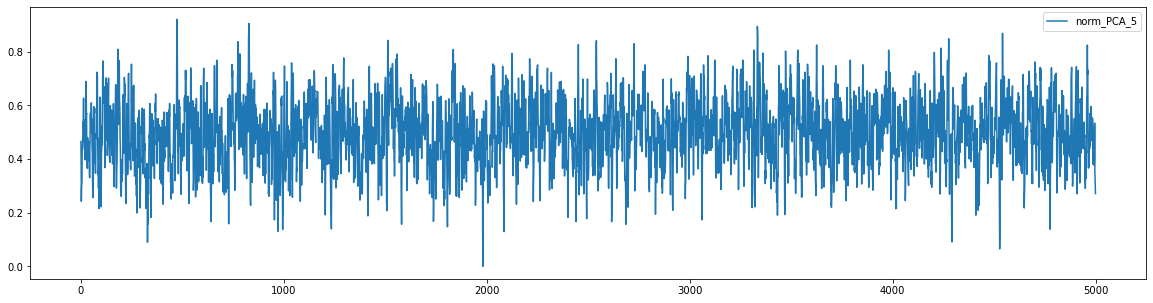

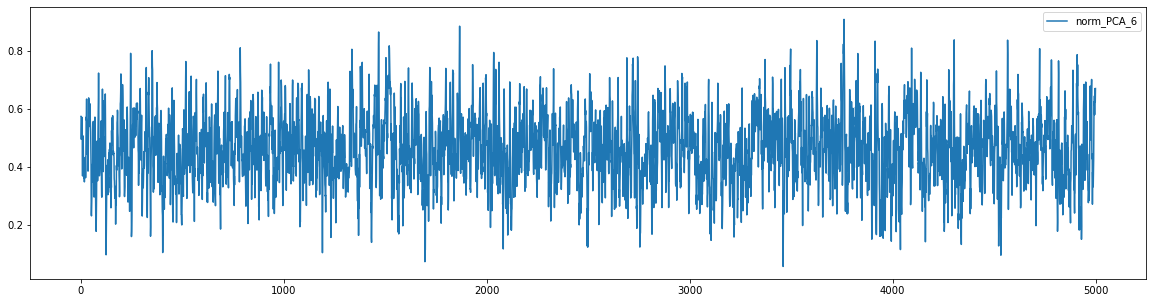

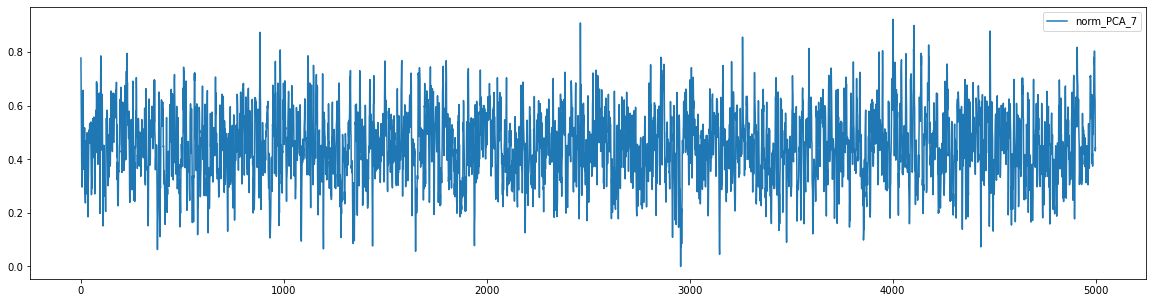

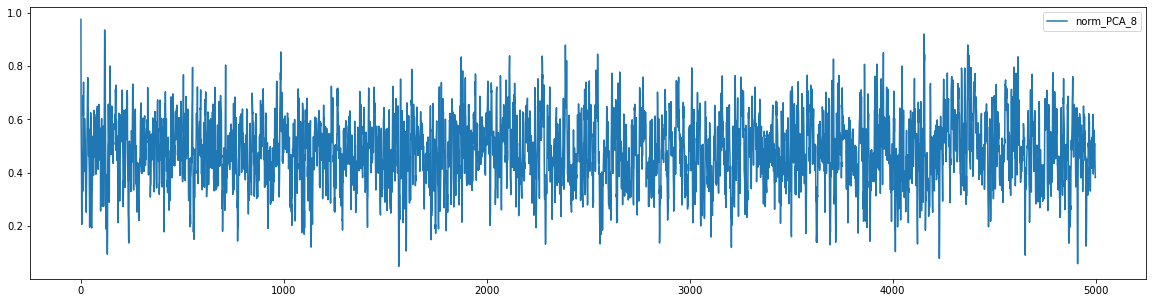

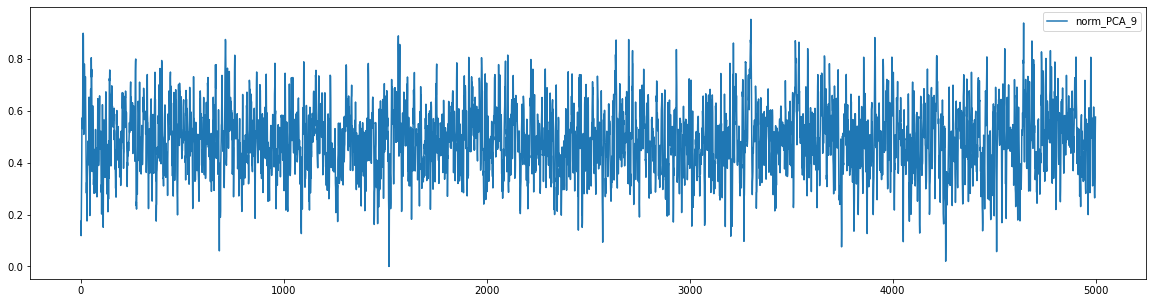

In [61]:
PCA_features=['norm_PCA_{}'.format(i) for i in range(1,10)]
for i in PCA_features:
    PCA_train_df.iloc[:5000].plot( y=[i],figsize=(20, 5))

In [62]:
PCA_features=['PCA_{}'.format(i) for i in range(1,10)]
PCA_features

['PCA_1',
 'PCA_2',
 'PCA_3',
 'PCA_4',
 'PCA_5',
 'PCA_6',
 'PCA_7',
 'PCA_8',
 'PCA_9']

In [63]:
scaler = StandardScaler()

temp_df=pd.DataFrame()
cols_normalize = PCA_features
norm_train_df = pd.DataFrame(scaler.fit_transform(PCA_train_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=PCA_train_df.index)
for feature_name in PCA_features:
    temp_df['scaled_'+feature_name] = norm_train_df[feature_name]
temp_df

scaled_PCA_1  scaled_PCA_2  scaled_PCA_3  scaled_PCA_4  scaled_PCA_5  \
0         -0.652442     -0.804733     -2.235049      3.797947     -0.227799   
1         -0.755227     -0.560682     -2.316667      2.893820     -0.729202   
2         -0.700741     -0.531767     -1.586190      1.805760     -2.044818   
3         -0.697572     -0.634704     -0.829374      1.571339     -1.662431   
4         -0.665240     -0.555118      0.400176      0.457526     -1.533827   
...             ...           ...           ...           ...           ...   
20626      0.086093      2.423320      1.311440      0.288358     -0.626355   
20627      0.044531      2.611783      1.090756      0.094151     -1.625543   
20628      0.037565      2.701437      0.516907      0.520345     -0.336395   
20629      0.042982      2.683621     -0.288730     -0.400729      0.216517   
20630      0.018882      2.790615     -0.392791      0.049860     -0.205461   

       scaled_PCA_6  scaled_PCA_7  scaled_PCA_8  scaled_PCA_9  
0          0.944203      2.577272      3.775113     -2.444858  
1          0.919551      1.920793      0.965605     -2.869387  
2          0.285849      0.926797      0.120382     -2.152028  
3          0.630494      0.101300     -0.737829     -1.563117  
4          0.917345     -0.775614     -2.094810     -0.775021  
...             ...           ...           ...           ...  
20626     -0.087489      0.695153      1.556290     -0.750677  
20627     -1.189616      0.881349      0.816840      0.657790  
20628      0.292458      1.511226     -0.626978      0.936714  
20629      0.346749      2.261635     -1.004350      0.445466  
20630     -0.432346      2.277693     -1.339429      0.306177  

[20631 rows x 9 columns]

In [64]:
PCA_train_df=pd.concat([PCA_train_df, temp_df], axis=1, join="inner")
PCA_train_df

PCA_1      PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0     -18.559902  -7.629596 -4.531158  6.763281 -0.165307  0.455421  0.958855   
1     -21.483808  -5.315774 -4.696624  5.153236 -0.529161  0.443531  0.714617   
2     -19.933862  -5.041629 -3.215713  3.215649 -1.483865  0.137875  0.344808   
3     -19.843714  -6.017566 -1.681406  2.798198 -1.206377  0.304109  0.037688   
4     -18.923988  -5.263016  0.811285  0.814750 -1.113053  0.442466 -0.288562   
...          ...        ...       ...       ...       ...       ...       ...   
20626   2.449064  22.975259  2.658707  0.513500 -0.454528 -0.042199  0.258627   
20627   1.266774  24.762055  2.211310  0.167662 -1.179609 -0.573792  0.327900   
20628   1.068599  25.612056  1.047935  0.926616 -0.244112  0.141063  0.562241   
20629   1.222712  25.443148 -0.585347 -0.713608  0.157120  0.167249  0.841425   
20630   0.537127  26.457552 -0.796313  0.088789 -0.149097 -0.208535  0.847399   

          PCA_8     PCA_9  norm_PCA_1  ...  norm_PCA_9  scaled_PCA_1  \
0      1.123571 -0.554793    0.123795  ...    0.173945     -0.652442   
1      0.287389 -0.651128    0.112840  ...    0.118670     -0.755227   
2      0.035829 -0.488343    0.118647  ...    0.212072     -0.700741   
3     -0.219597 -0.354706    0.118985  ...    0.288750     -0.697572   
4     -0.623470 -0.175870    0.122431  ...    0.391362     -0.665240   
...         ...       ...         ...  ...         ...           ...   
20626  0.463192 -0.170345    0.202513  ...    0.394532      0.086093   
20627  0.243113  0.149267    0.198083  ...    0.577918      0.044531   
20628 -0.186605  0.212561    0.197341  ...    0.614235      0.037565   
20629 -0.298920  0.101086    0.197918  ...    0.550273      0.042982   
20630 -0.398649  0.069478    0.195349  ...    0.532137      0.018882   

       scaled_PCA_2  scaled_PCA_3  scaled_PCA_4  scaled_PCA_5  scaled_PCA_6  \
0         -0.804733     -2.235049      3.797947     -0.227799      0.944203   
1         -0.560682     -2.316667      2.893820     -0.729202      0.919551   
2         -0.531767     -1.586190      1.805760     -2.044818      0.285849   
3         -0.634704     -0.829374      1.571339     -1.662431      0.630494   
4         -0.555118      0.400176      0.457526     -1.533827      0.917345   
...             ...           ...           ...           ...           ...   
20626      2.423320      1.311440      0.288358     -0.626355     -0.087489   
20627      2.611783      1.090756      0.094151     -1.625543     -1.189616   
20628      2.701437      0.516907      0.520345     -0.336395      0.292458   
20629      2.683621     -0.288730     -0.400729      0.216517      0.346749   
20630      2.790615     -0.392791      0.049860     -0.205461     -0.432346   

       scaled_PCA_7  scaled_PCA_8  scaled_PCA_9  
0          2.577272      3.775113     -2.444858  
1          1.920793      0.965605     -2.869387  
2          0.926797      0.120382     -2.152028  
3          0.101300     -0.737829     -1.563117  
4         -0.775614     -2.094810     -0.775021  
...             ...           ...           ...  
20626      0.695153      1.556290     -0.750677  
20627      0.881349      0.816840      0.657790  
20628      1.511226     -0.626978      0.936714  
20629      2.261635     -1.004350      0.445466  
20630      2.277693     -1.339429      0.306177  

[20631 rows x 27 columns]

In [65]:
temp_df=pd.DataFrame()
cols_normalize = PCA_features
norm_test_df = pd.DataFrame(scaler.transform(PCA_test_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=PCA_test_df.index)
for feature_name in PCA_features:
    temp_df['scaled_'+feature_name] = norm_test_df[feature_name]
temp_df

scaled_PCA_1  scaled_PCA_2  scaled_PCA_3  scaled_PCA_4  scaled_PCA_5  \
0         -0.526599     -0.656410     -0.433485     -3.276663      0.981659   
1         -0.303320     -0.783245     -1.430895     -1.232671      1.478811   
2         -0.283402     -0.607308     -1.067280     -1.989931      1.269113   
3         -0.334279     -0.503856     -0.293247     -0.909159      0.469196   
4         -0.347907     -0.448841     -0.290274      0.147748     -0.596901   
...             ...           ...           ...           ...           ...   
13091      3.796906      1.658475      0.158089      0.445098      0.901642   
13092      3.877586      1.903132      0.000621      1.246991     -0.077766   
13093      3.952563      1.578593     -0.136571      1.139606      1.032227   
13094      4.050973      1.684990      0.238846      1.137610      0.730729   
13095      4.140090      1.967449      0.580661      0.373703      0.633826   

       scaled_PCA_6  scaled_PCA_7  scaled_PCA_8  scaled_PCA_9  
0          2.875506      3.173444      0.366734      3.549060  
1         -0.043911      0.885387     -1.417313     -0.811846  
2         -0.336540      0.952792     -1.047974     -1.413228  
3          0.199286      0.667683     -1.451521     -0.411483  
4          0.147167      0.094385     -1.433074     -1.424648  
...             ...           ...           ...           ...  
13091     -0.467701      1.128196     -0.849676      1.545205  
13092     -0.323363      1.509237     -0.856367      1.897300  
13093      0.768721      1.713420     -0.639518      1.703547  
13094      0.670564      2.053221     -0.765748      1.652584  
13095     -0.543932      1.534020      0.491630      1.381333  

[13096 rows x 9 columns]

In [66]:
PCA_test_df=pd.concat([PCA_test_df, temp_df], axis=1, join="inner")
PCA_test_df

PCA_1      PCA_2     PCA_3     PCA_4     PCA_5     PCA_6  \
0      -14.980062  -6.223358 -0.878813 -5.834992  0.712361  1.386954   
1       -8.628487  -7.425867 -2.900880 -2.195107  1.073130 -0.021180   
2       -8.061903  -5.757828 -2.163717 -3.543615  0.920958 -0.162325   
3       -9.509169  -4.777012 -0.594506 -1.619006  0.340482  0.096122   
4       -9.896847  -4.255422 -0.588477  0.263106 -0.433154  0.070984   
...           ...        ...       ...       ...       ...       ...   
13091  108.009956  15.723843  0.320496  0.792619  0.654295 -0.225588   
13092  110.305063  18.043411  0.001259  2.220607 -0.056432 -0.155969   
13093  112.437914  14.966490 -0.276873  2.029380  0.749057  0.370780   
13094  115.237357  15.975228  0.484217  2.025826  0.530269  0.323436   
13095  117.772464  18.653193  1.177185  0.665481  0.459949 -0.262357   

          PCA_7     PCA_8     PCA_9  norm_PCA_1  ...  norm_PCA_9  \
0      1.180657  0.109150  0.805360    0.123795  ...    0.173945   
1      0.329402 -0.421829 -0.184226    0.112840  ...    0.118670   
2      0.354479 -0.311904 -0.320693    0.118647  ...    0.212072   
3      0.248407 -0.432010 -0.093375    0.118985  ...    0.288750   
4      0.035115 -0.426520 -0.323284    0.122431  ...    0.391362   
...         ...       ...       ...         ...  ...         ...   
13091  0.419737 -0.252885  0.350641    0.208895  ...    0.428619   
13092  0.561501 -0.254877  0.430539    0.208927  ...    0.361365   
13093  0.637466 -0.190337  0.386573    0.214686  ...    0.396445   
13094  0.763886 -0.227906  0.375008    0.213248  ...    0.331012   
13095  0.570721  0.146322  0.313455    0.221187  ...    0.502917   

       scaled_PCA_1  scaled_PCA_2  scaled_PCA_3  scaled_PCA_4  scaled_PCA_5  \
0         -0.526599     -0.656410     -0.433485     -3.276663      0.981659   
1         -0.303320     -0.783245     -1.430895     -1.232671      1.478811   
2         -0.283402     -0.607308     -1.067280     -1.989931      1.269113   
3         -0.334279     -0.503856     -0.293247     -0.909159      0.469196   
4         -0.347907     -0.448841     -0.290274      0.147748     -0.596901   
...             ...           ...           ...           ...           ...   
13091      3.796906      1.658475      0.158089      0.445098      0.901642   
13092      3.877586      1.903132      0.000621      1.246991     -0.077766   
13093      3.952563      1.578593     -0.136571      1.139606      1.032227   
13094      4.050973      1.684990      0.238846      1.137610      0.730729   
13095      4.140090      1.967449      0.580661      0.373703      0.633826   

       scaled_PCA_6  scaled_PCA_7  scaled_PCA_8  scaled_PCA_9  
0          2.875506      3.173444      0.366734      3.549060  
1         -0.043911      0.885387     -1.417313     -0.811846  
2         -0.336540      0.952792     -1.047974     -1.413228  
3          0.199286      0.667683     -1.451521     -0.411483  
4          0.147167      0.094385     -1.433074     -1.424648  
...             ...           ...           ...           ...  
13091     -0.467701      1.128196     -0.849676      1.545205  
13092     -0.323363      1.509237     -0.856367      1.897300  
13093      0.768721      1.713420     -0.639518      1.703547  
13094      0.670564      2.053221     -0.765748      1.652584  
13095     -0.543932      1.534020      0.491630      1.381333  

[13096 rows x 27 columns]

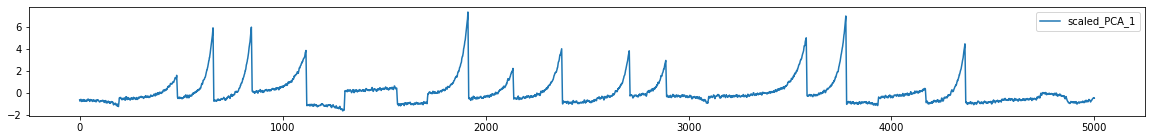

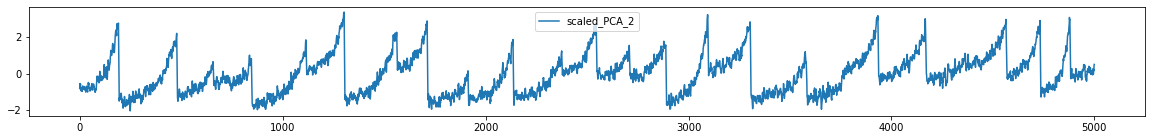

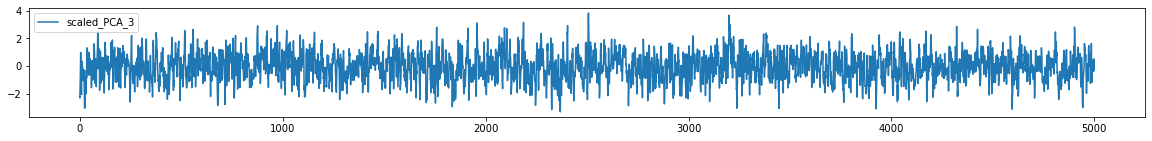

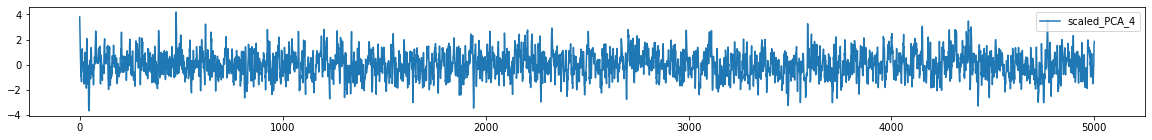

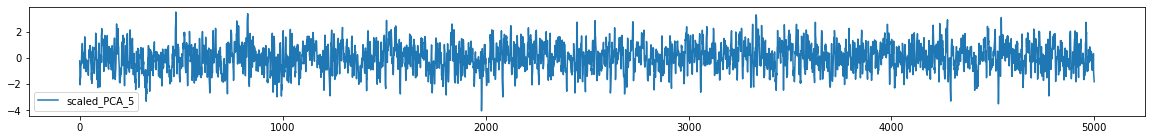

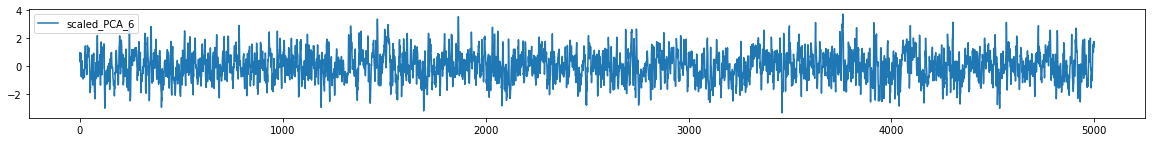

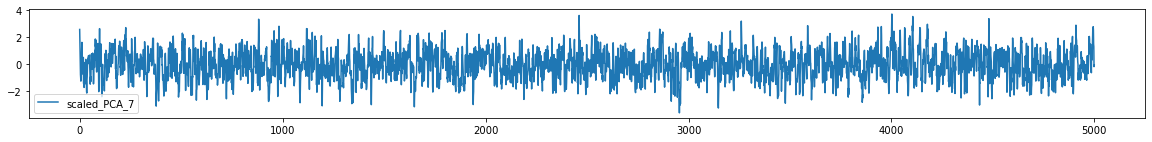

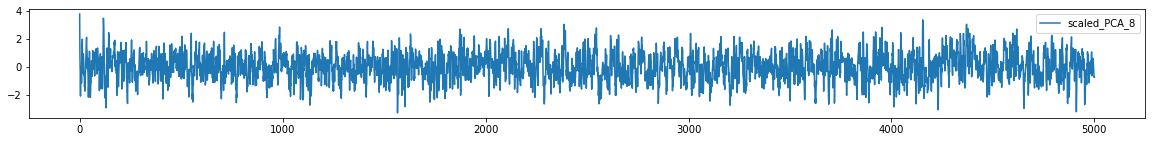

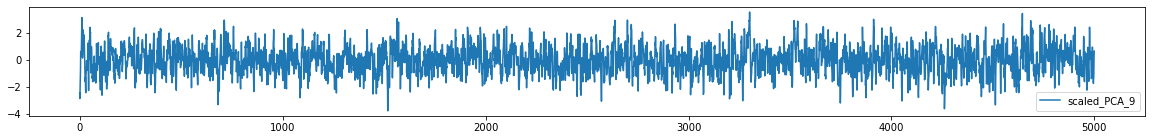

In [67]:
PCA_features=['scaled_PCA_{}'.format(i) for i in range(1,10)]
for i in PCA_features:
    PCA_train_df.iloc[:5000].plot( y=[i],figsize=(20, 2))

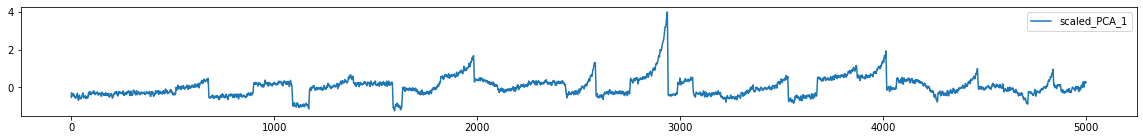

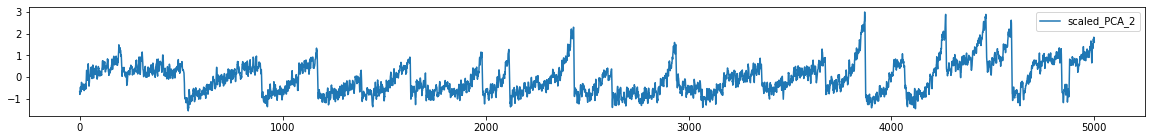

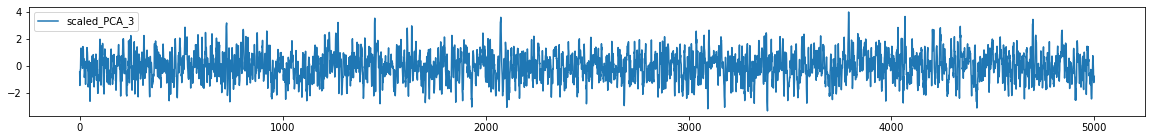

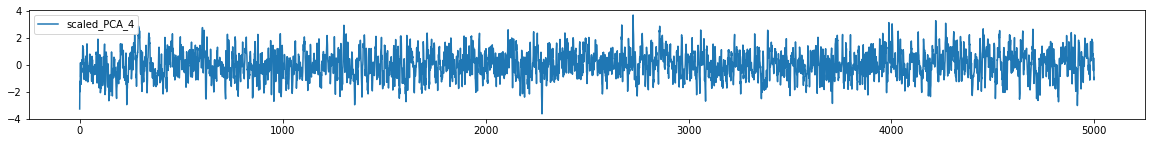

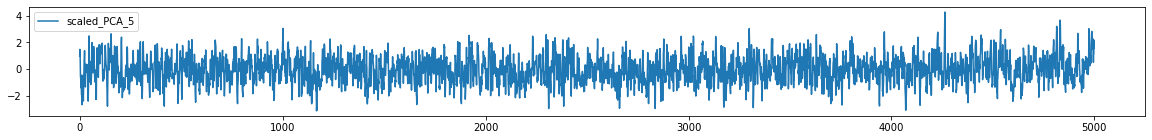

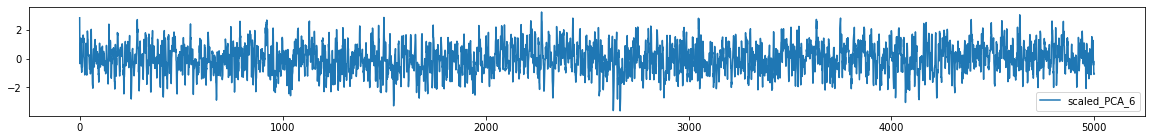

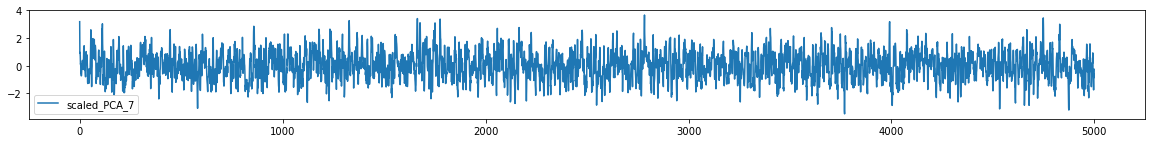

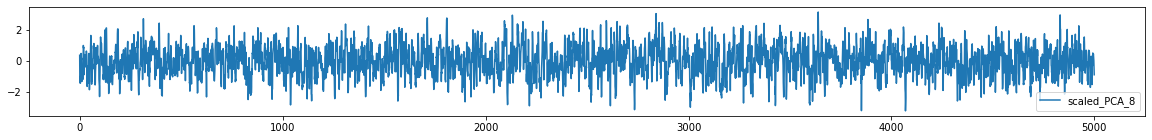

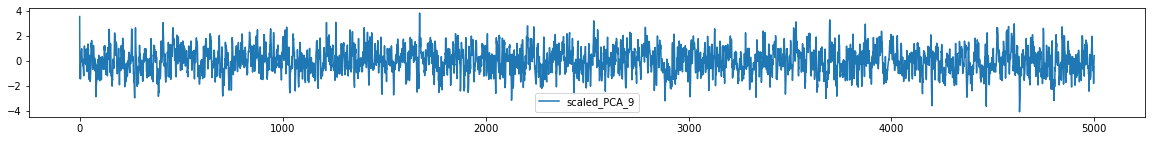

In [68]:
PCA_features=['scaled_PCA_{}'.format(i) for i in range(1,10)]
for i in PCA_features:
    PCA_test_df.iloc[0:5000].plot( y=[i],figsize=(20, 2))

In [69]:
train = pd.concat([train, PCA_train_df], axis=1, join="inner")

In [70]:
train.head()

id  time_cycles     s_2      s_3      s_4     s_7      s_9   s_11    s_12  \
0   1            1  641.82  1589.70  1400.60  554.36  9046.19  47.47  521.66   
1   1            2  642.15  1591.82  1403.14  553.75  9044.07  47.49  522.28   
2   1            3  642.35  1587.99  1404.20  554.26  9052.94  47.27  522.42   
3   1            4  642.35  1582.79  1401.87  554.45  9049.48  47.13  522.86   
4   1            5  642.37  1582.85  1406.22  554.00  9055.15  47.28  522.19   

      s_14  ...  norm_PCA_9  scaled_PCA_1  scaled_PCA_2  scaled_PCA_3  \
0  8138.62  ...    0.173945     -0.652442     -0.804733     -2.235049   
1  8131.49  ...    0.118670     -0.755227     -0.560682     -2.316667   
2  8133.23  ...    0.212072     -0.700741     -0.531767     -1.586190   
3  8133.83  ...    0.288750     -0.697572     -0.634704     -0.829374   
4  8133.80  ...    0.391362     -0.665240     -0.555118      0.400176   

   scaled_PCA_4  scaled_PCA_5  scaled_PCA_6  scaled_PCA_7  scaled_PCA_8  \
0      3.797947     -0.227799      0.944203      2.577272      3.775113   
1      2.893820     -0.729202      0.919551      1.920793      0.965605   
2      1.805760     -2.044818      0.285849      0.926797      0.120382   
3      1.571339     -1.662431      0.630494      0.101300     -0.737829   
4      0.457526     -1.533827      0.917345     -0.775614     -2.094810   

   scaled_PCA_9  
0     -2.444858  
1     -2.869387  
2     -2.152028  
3     -1.563117  
4     -0.775021  

[5 rows x 68 columns]

In [71]:
test = pd.concat([test, PCA_test_df], axis=1, join="inner")
test

id  time_cycles     s_2      s_3      s_4     s_7      s_9   s_11  \
0        1            1  643.02  1585.29  1398.21  553.90  9050.17  47.20   
1        1            2  641.71  1588.45  1395.42  554.85  9054.42  47.50   
2        1            3  642.46  1586.94  1401.34  554.11  9056.96  47.50   
3        1            4  642.44  1584.12  1406.42  554.07  9045.29  47.28   
4        1            5  642.51  1587.19  1401.92  554.16  9044.55  47.31   
...    ...          ...     ...      ...      ...     ...      ...    ...   
13091  100          194  643.24  1599.45  1415.79  553.41  9142.37  47.69   
13092  100          195  643.22  1595.69  1422.05  553.22  9140.68  47.60   
13093  100          196  643.44  1593.15  1406.82  553.04  9146.81  47.57   
13094  100          197  643.26  1594.99  1419.36  553.37  9148.85  47.61   
13095  100          198  642.95  1601.62  1424.99  552.48  9155.03  47.80   

         s_12     s_14  ...  norm_PCA_9  scaled_PCA_1  scaled_PCA_2  \
0      521.72  8125.55  ...    0.173945     -0.526599     -0.656410   
1      522.16  8139.62  ...    0.118670     -0.303320     -0.783245   
2      521.97  8130.10  ...    0.212072     -0.283402     -0.607308   
3      521.38  8132.90  ...    0.288750     -0.334279     -0.503856   
4      522.15  8129.54  ...    0.391362     -0.347907     -0.448841   
...       ...      ...  ...         ...           ...           ...   
13091  520.69  8213.28  ...    0.428619      3.796906      1.658475   
13092  521.05  8210.85  ...    0.361365      3.877586      1.903132   
13093  521.18  8217.24  ...    0.396445      3.952563      1.578593   
13094  521.33  8220.48  ...    0.331012      4.050973      1.684990   
13095  521.07  8214.64  ...    0.502917      4.140090      1.967449   

       scaled_PCA_3  scaled_PCA_4  scaled_PCA_5  scaled_PCA_6  scaled_PCA_7  \
0         -0.433485     -3.276663      0.981659      2.875506      3.173444   
1         -1.430895     -1.232671      1.478811     -0.043911      0.885387   
2         -1.067280     -1.989931      1.269113     -0.336540      0.952792   
3         -0.293247     -0.909159      0.469196      0.199286      0.667683   
4         -0.290274      0.147748     -0.596901      0.147167      0.094385   
...             ...           ...           ...           ...           ...   
13091      0.158089      0.445098      0.901642     -0.467701      1.128196   
13092      0.000621      1.246991     -0.077766     -0.323363      1.509237   
13093     -0.136571      1.139606      1.032227      0.768721      1.713420   
13094      0.238846      1.137610      0.730729      0.670564      2.053221   
13095      0.580661      0.373703      0.633826     -0.543932      1.534020   

       scaled_PCA_8  scaled_PCA_9  
0          0.366734      3.549060  
1         -1.417313     -0.811846  
2         -1.047974     -1.413228  
3         -1.451521     -0.411483  
4         -1.433074     -1.424648  
...             ...           ...  
13091     -0.849676      1.545205  
13092     -0.856367      1.897300  
13093     -0.639518      1.703547  
13094     -0.765748      1.652584  
13095      0.491630      1.381333  

[13096 rows x 68 columns]

In [72]:
train.columns

Index(['id', 'time_cycles', 's_2', 's_3', 's_4', 's_7', 's_9', 's_11', 's_12',
       's_14', 's_17', 'RUL', 'label1', 'label2', 'rollingmean4_s_2',
       'rollingmean4_s_3', 'rollingmean4_s_4', 'rollingmean4_s_7',
       'rollingmean4_s_9', 'rollingmean4_s_11', 'rollingmean4_s_12',
       'rollingmean4_s_14', 'rollingmean4_s_17', 'norm_rollingmean4_s_2',
       'norm_rollingmean4_s_3', 'norm_rollingmean4_s_4',
       'norm_rollingmean4_s_7', 'norm_rollingmean4_s_9',
       'norm_rollingmean4_s_11', 'norm_rollingmean4_s_12',
       'norm_rollingmean4_s_14', 'norm_rollingmean4_s_17',
       'scaled_rollingmean4_s_2', 'scaled_rollingmean4_s_3',
       'scaled_rollingmean4_s_4', 'scaled_rollingmean4_s_7',
       'scaled_rollingmean4_s_9', 'scaled_rollingmean4_s_11',
       'scaled_rollingmean4_s_12', 'scaled_rollingmean4_s_14',
       'scaled_rollingmean4_s_17', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5',
       'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'norm_PCA_1', 'norm_PCA_2',
       'nor

In [73]:
train_corr_list=[]
input_features=[]
for col in train.columns:
    input_features.append(col)
input_features.remove('id')
input_features.remove('time_cycles')
train_corr_list=train[train.columns[2:]].corr()['RUL'][:]
train_corr_dict = dict(zip(train_corr_list,input_features))
train_sorted_corr_dict = sorted(train_corr_dict.items())
print("Train")
train_sorted_corr_dict

Train


[(-0.6962281014553727, 's_11'),
 (-0.69499907252847, 'rollingmean4_s_11'),
 (-0.6949990725284597, 'norm_rollingmean4_s_11'),
 (-0.6949990725284553, 'scaled_rollingmean4_s_11'),
 (-0.6940876261506518, 'scaled_rollingmean4_s_4'),
 (-0.6940876261506507, 'norm_rollingmean4_s_4'),
 (-0.6940876261506168, 'rollingmean4_s_4'),
 (-0.6789482333860427, 's_4'),
 (-0.6742762086042169, 'scaled_rollingmean4_s_17'),
 (-0.6742762086042132, 'norm_rollingmean4_s_17'),
 (-0.6742762086042062, 'rollingmean4_s_17'),
 (-0.669517734564297, 'rollingmean4_s_2'),
 (-0.6695177345639104, 'norm_rollingmean4_s_2'),
 (-0.6695177345639102, 'scaled_rollingmean4_s_2'),
 (-0.6680784511779952, 'rollingmean4_s_3'),
 (-0.6680784511778749, 'norm_rollingmean4_s_3'),
 (-0.668078451177874, 'scaled_rollingmean4_s_3'),
 (-0.6226672559863455, 'scaled_PCA_2'),
 (-0.6226672559863431, 'PCA_2'),
 (-0.622667255986338, 'norm_PCA_2'),
 (-0.6064839743785985, 's_2'),
 (-0.6061535537829565, 's_17'),
 (-0.5845203909176561, 's_3'),
 (-0.566595

In [74]:
test_corr_list=[]
input_features=[]
for col in test.columns:
    input_features.append(col)
input_features.remove('id')
input_features.remove('time_cycles')
test_corr_list=test[test.columns[2:]].corr()['RUL'][:]
test_corr_dict = dict(zip(test_corr_list,input_features))
test_sorted_corr_dict = sorted(test_corr_dict.items())
print("Test")
test_sorted_corr_dict

Test


[(-0.3695745749843289, 'scaled_PCA_2'),
 (-0.3695745749843288, 'PCA_2'),
 (-0.3626640639368926, 'norm_rollingmean4_s_11'),
 (-0.3626640639368896, 'scaled_rollingmean4_s_11'),
 (-0.3626640639368702, 'rollingmean4_s_11'),
 (-0.36122104911969727, 'norm_rollingmean4_s_4'),
 (-0.36122104911969394, 'scaled_rollingmean4_s_4'),
 (-0.36122104911969344, 'rollingmean4_s_4'),
 (-0.3418376649955928, 's_11'),
 (-0.32570367958019764, 's_4'),
 (-0.32038518713744873, 'norm_rollingmean4_s_2'),
 (-0.3203851871374487, 'scaled_rollingmean4_s_2'),
 (-0.3203851871372952, 'rollingmean4_s_2'),
 (-0.3164699619620305, 'norm_rollingmean4_s_17'),
 (-0.31646996196202926, 'scaled_rollingmean4_s_17'),
 (-0.3164699619620252, 'rollingmean4_s_17'),
 (-0.3147052676085642, 'label1'),
 (-0.30928232378435844, 'scaled_rollingmean4_s_3'),
 (-0.3092823237843566, 'norm_rollingmean4_s_3'),
 (-0.3092823237843302, 'rollingmean4_s_3'),
 (-0.30238985542726804, 'label2'),
 (-0.2576535276892509, 's_2'),
 (-0.24935883515867238, 's_17')

In [75]:
train.iloc[:,[2,3,4,5,6,7,8,9,10]]

s_2      s_3      s_4     s_7      s_9   s_11    s_12     s_14  s_17
0      641.82  1589.70  1400.60  554.36  9046.19  47.47  521.66  8138.62   392
1      642.15  1591.82  1403.14  553.75  9044.07  47.49  522.28  8131.49   392
2      642.35  1587.99  1404.20  554.26  9052.94  47.27  522.42  8133.23   390
3      642.35  1582.79  1401.87  554.45  9049.48  47.13  522.86  8133.83   392
4      642.37  1582.85  1406.22  554.00  9055.15  47.28  522.19  8133.80   393
...       ...      ...      ...     ...      ...    ...     ...      ...   ...
20626  643.49  1597.98  1428.63  551.43  9065.52  48.07  519.49  8137.60   397
20627  643.54  1604.50  1433.58  550.86  9065.11  48.04  519.68  8136.50   395
20628  643.42  1602.46  1428.18  550.94  9065.90  48.09  520.01  8141.05   398
20629  643.23  1605.26  1426.53  550.68  9073.72  48.39  519.67  8139.29   395
20630  643.85  1600.38  1432.14  550.79  9061.48  48.20  519.30  8137.33   396

[20631 rows x 9 columns]

In [76]:
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

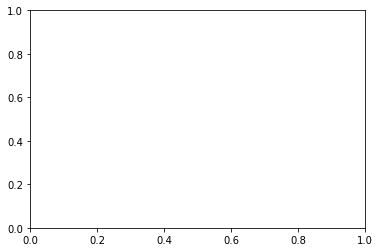

In [77]:
fig, ax = plt.subplots()

In [78]:
listtt=[]
for i in range(1,100):
    listtt.append(i)


Engine # 81
Coefficients:  [[   0.6229765  -118.33653774 -122.00055115   23.17262766]]
Regression Score: 0.50
MSE: 952.14
RMSE: 30.86
R-squared: 0.75


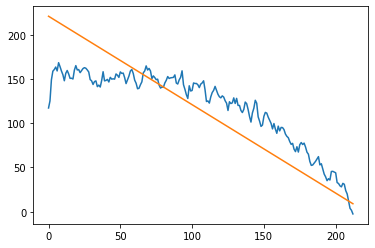


Engine # 76
Coefficients:  [[   0.6229765  -118.33653774 -122.00055115   23.17262766]]
Regression Score: 0.50
MSE: 815.44
RMSE: 28.56
R-squared: 0.77


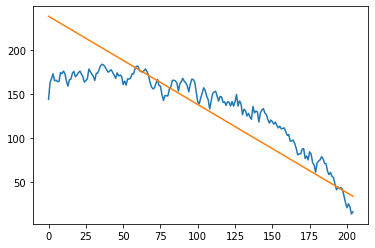

2

In [92]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


selected_list=['scaled_rollingmean4_s_12','norm_rollingmean4_s_11','norm_rollingmean4_s_4','norm_rollingmean4_s_7']
engine_list=[81, 76]
negative_r2=[]
positive_r2=[]

y_train=pd.DataFrame()
X_train=pd.DataFrame()

y_train['RUL']=train['RUL']
y_train_arr = y_train['RUL'].to_numpy()

        
for j in selected_list:
        X_train[j]=train[j]
        
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

for i in engine_list:
    
        X_test=pd.DataFrame()
        y_test=pd.DataFrame()

        a=str('id == '+str(i))

        temp_test_df=test.query(a)
        y_test['RUL']=temp_test_df['RUL']
        y_test_arr = y_test['RUL'].to_numpy()

        for j in selected_list:
            X_test[j]=temp_test_df[j]
            
        pred = regr.predict(X_test)
        print("\nEngine # %d" % i)
        print("Coefficients: ", regr.coef_)
        print("Regression Score: %.2f" % regr.score(X_train,y_train))
        print("MSE: %.2f" % mean_squared_error(y_test,pred))
        print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test,pred)))
        print("R-squared: %.2f" % r2_score(y_test,pred))
        if (r2_score(y_test,pred)<0):
            negative_r2.append(i)
        else:
            positive_r2.append(i)
        plt.plot(pred)
        y_test=y_test.reset_index(drop=True)
        plt.plot(y_test['RUL'])
        plt.show() 
len(positive_r2)        

In [80]:
from sklearn import svm
from sklearn import metrics

binclass_selected_list=['scaled_rollingmean4_s_3','scaled_rollingmean4_s_4','scaled_rollingmean4_s_7',
                        'scaled_rollingmean4_s_12','scaled_PCA_1','scaled_PCA_2','scaled_PCA_3','scaled_PCA_4','scaled_PCA_5']

engine_list=[81,91]

X_train=pd.DataFrame()
y_train=pd.DataFrame()    
    
y_train['label1']=train['label1']
y_train_arr = y_train['label1'].to_numpy()
    
for j in binclass_selected_list:
    X_train[j] = train[j]
    
clf = svm.SVC(kernel='linear')

clf.fit(X_train,y_train_arr)
for i in engine_list:
    
    X_test=pd.DataFrame()
    y_test=pd.DataFrame()
    
    a=str('id == '+str(i))
        
    temp_test_df=test.query(a)
    
    y_test['label1']=temp_test_df['label1']
    y_test_arr = y_test['label1'].to_numpy()
    
    for j in binclass_selected_list:
        X_test[j] = temp_test_df[j]  
        
    y_pred = clf.predict(X_test)
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print("\nEngine #%d" % i)
    print("Confusion matrix: ")
    print(cnf_matrix)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall: ",metrics.recall_score(y_test, y_pred))


Engine #81
Confusion matrix: 
[[180  11]
 [  0  22]]
Accuracy: 0.9483568075117371
Precision: 0.6666666666666666
Recall:  1.0

Engine #91
Confusion matrix: 
[[214   9]
 [  0  11]]
Accuracy: 0.9615384615384616
Precision: 0.55
Recall:  1.0


In [81]:
X_train=pd.DataFrame()
y_train=pd.DataFrame()
for j in selected_list:
    X_train[j]=train[j]
y_train['label1']=train['label1']
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train_arr)
y_pred = clf.predict(X_train)
cnf_matrix = metrics.confusion_matrix(y_train['label1'], y_pred)
print("Confusion matrix: ")
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_train['label1'], y_pred))
print("Precision:",metrics.precision_score(y_train['label1'], y_pred))
print("Recall: ",metrics.recall_score(y_train['label1'], y_pred))

Confusion matrix: 
[[17081   450]
 [  692  2408]]
Accuracy: 0.9446464058940429
Precision: 0.8425472358292512
Recall:  0.7767741935483871


In [82]:
X_test=pd.DataFrame()
y_test=pd.DataFrame()
X_train=pd.DataFrame()
y_train=pd.DataFrame()
for j in selected_list:
    X_test[j]=test[j]
for j in selected_list:
    X_train[j]=train[j]
clf = svm.SVC(kernel='linear')
y_test['label1']=test['label1']
y_train['label1']=train['label1']
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test['label1'], y_pred)
print("Confusion matrix: ")
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test['label1'], y_pred))
print("Precision:",metrics.precision_score(y_test['label1'], y_pred))
print("Recall: ",metrics.recall_score(y_test['label1'], y_pred))

C:\Users\doruk\anaconda3\envs\Pandas\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix: 
[[12596   168]
 [  256    76]]
Accuracy: 0.967623701893708
Precision: 0.3114754098360656
Recall:  0.2289156626506024


In [83]:
from sklearn.tree import DecisionTreeRegressor 

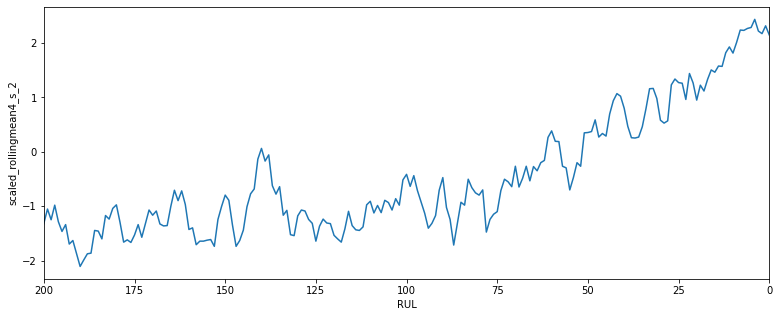

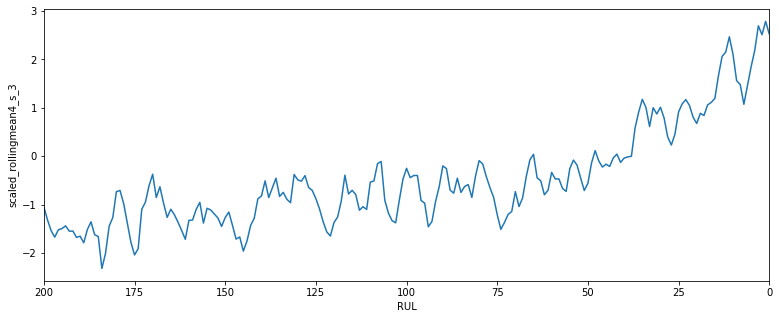

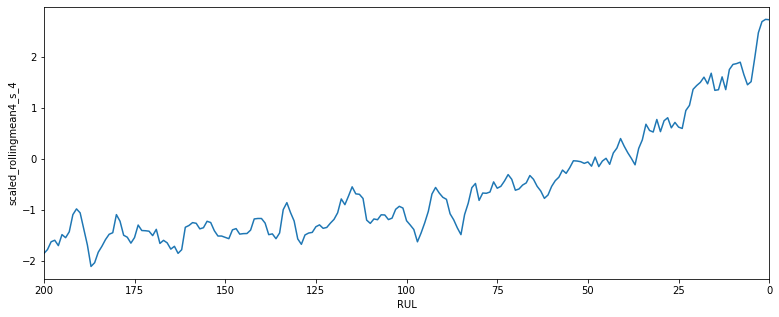

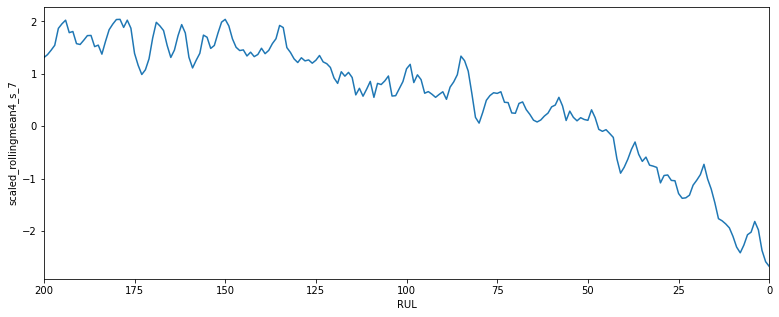

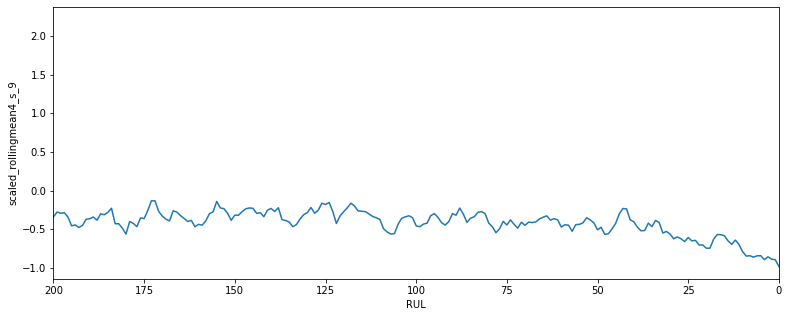

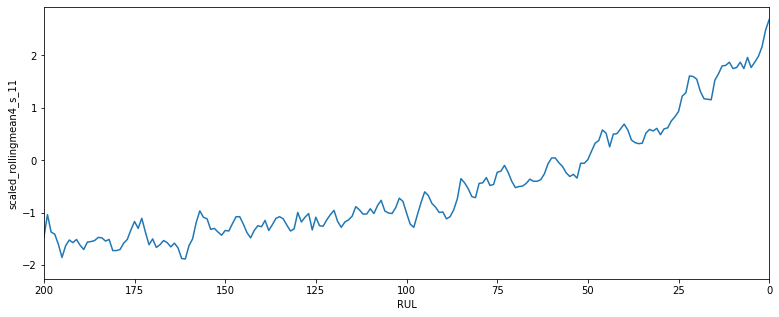

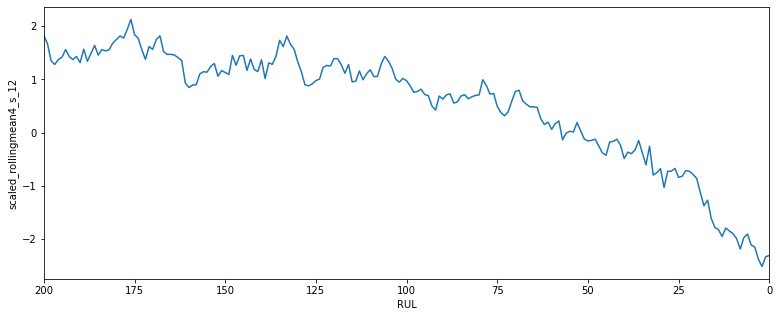

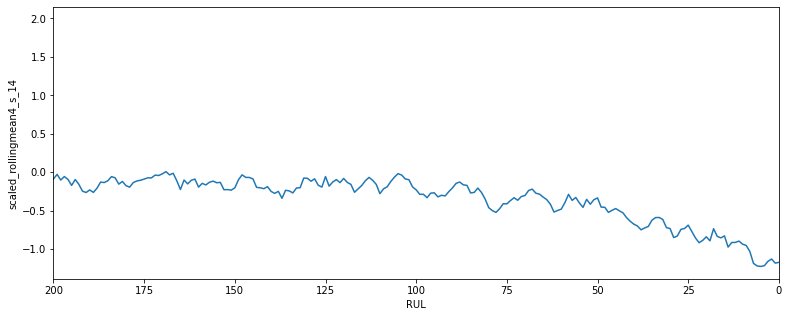

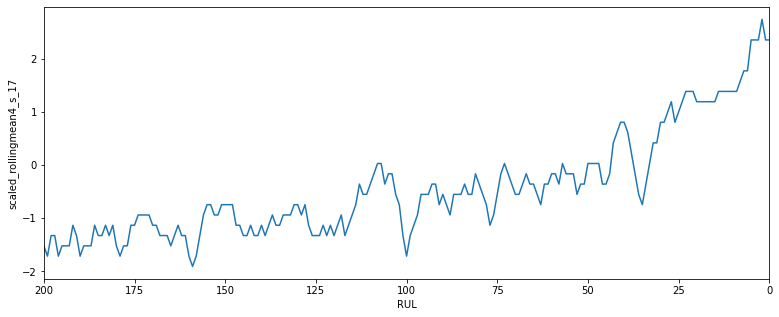

In [84]:
for sensor_name in scaled_rolling_sensor_names:
    plot_sensor(train,sensor_name,200)

In [85]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

binclass_selected_list=['scaled_rollingmean4_s_3','scaled_rollingmean4_s_4','scaled_rollingmean4_s_7',
                        'scaled_rollingmean4_s_12','scaled_PCA_1','scaled_PCA_2','scaled_PCA_3','scaled_PCA_4','scaled_PCA_5']

engine_list=[81,91]

X_train=pd.DataFrame()
y_train=pd.DataFrame()    
    
y_train['label1']=train['label1']
y_train_arr = y_train['label1'].to_numpy()
    
for j in binclass_selected_list:
    X_train[j] = train[j]

logistic_regr = LogisticRegression()
logistic_regr.fit(X_train,y_train_arr)
    
for i in engine_list:
    
    X_test=pd.DataFrame()
    y_test=pd.DataFrame()
    
    a=str('id == '+str(i))
        
    temp_test_df=test.query(a)
    
    y_test['label1']=temp_test_df['label1']
    y_test_arr = y_test['label1'].to_numpy()
    
    for j in binclass_selected_list:
        X_test[j] = temp_test_df[j]  
        
    y_pred = logistic_regr.predict(X_test)
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print("\nEngine #%d" % i)
    print("Confusion matrix: ")
    print(cnf_matrix)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall: ",metrics.recall_score(y_test, y_pred))


Engine #81
Confusion matrix: 
[[183   8]
 [  0  22]]
Accuracy: 0.9624413145539906
Precision: 0.7333333333333333
Recall:  1.0

Engine #91
Confusion matrix: 
[[214   9]
 [  0  11]]
Accuracy: 0.9615384615384616
Precision: 0.55
Recall:  1.0


In [86]:
X_train=pd.DataFrame()
y_train=pd.DataFrame()
for j in selected_list:
    X_train[j]=train[j]
y_train['label1']=train['label1']
logistic_regr = LogisticRegression()
logistic_regr.fit(X_train,y_train)
y_pred = logistic_regr.predict(X_train)
cnf_matrix = metrics.confusion_matrix(y_train['label1'], y_pred)
print("Confusion matrix: ")
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_train['label1'], y_pred))
print("Precision:",metrics.precision_score(y_train['label1'], y_pred))
print("Recall: ",metrics.recall_score(y_train['label1'], y_pred))

Confusion matrix: 
[[17081   450]
 [  696  2404]]
Accuracy: 0.9444525229024284
Precision: 0.8423265592151367
Recall:  0.775483870967742


C:\Users\doruk\anaconda3\envs\Pandas\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

binclass_selected_list=['scaled_rollingmean4_s_3','scaled_rollingmean4_s_4','scaled_rollingmean4_s_7',
                        'scaled_rollingmean4_s_12','scaled_PCA_1','scaled_PCA_2',]

engine_list=[81,91]
X_train=pd.DataFrame()
y_train=pd.DataFrame()

y_train['label1']=train['label1']
y_train_arr = y_train['label1'].to_numpy()
    
for j in binclass_selected_list:
    X_train[j] = train[j]

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
        
for i in engine_list:
    
    X_test=pd.DataFrame()
    y_test=pd.DataFrame()
    
    a=str('id == '+str(i))
        
    temp_test_df=test.query(a)
    
    y_test['label1']=temp_test_df['label1']
    y_test_arr = y_test['label1'].to_numpy()
    
    for j in binclass_selected_list:
        X_test[j] = temp_test_df[j]  
        
    y_pred = clf.predict(X_test)
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print("\nEngine #%d" % i)
    print("Confusion matrix: ")
    print(cnf_matrix)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall: ",metrics.recall_score(y_test, y_pred))


Engine #81
Confusion matrix: 
[[184   7]
 [  4  18]]
Accuracy: 0.9483568075117371
Precision: 0.72
Recall:  0.8181818181818182

Engine #91
Confusion matrix: 
[[200  23]
 [  5   6]]
Accuracy: 0.8803418803418803
Precision: 0.20689655172413793
Recall:  0.5454545454545454


In [88]:
from sklearn.ensemble import RandomForestClassifier

X_train=pd.DataFrame()
y_train=pd.DataFrame()

y_train['label1']=train['label1']
y_train_arr = y_train['label1'].to_numpy()
    
for j in binclass_selected_list:
    X_train[j] = train[j]
    
random_forest_clf=RandomForestClassifier(n_estimators=100)
random_forest_clf.fit(X_train,y_train_arr) 

engine_list=[18, 34, 40, 79, 81,91]
for i in engine_list:
    

    X_test=pd.DataFrame()
    y_test=pd.DataFrame()
    
    a=str('id == '+str(i))
        
    temp_test_df=test.query(a)
    
    y_test['label1']=temp_test_df['label1']
    y_test_arr = y_test['label1'].to_numpy()
    
    for j in binclass_selected_list:
        X_test[j] = temp_test_df[j]  
        
    y_pred=random_forest_clf.predict(X_test)

    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print("\nEngine #%d" % i)
    print("Confusion matrix: ")
    print(cnf_matrix)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall: ",metrics.recall_score(y_test, y_pred))


Engine #18
Confusion matrix: 
[[133]]
Accuracy: 1.0
Precision: 0.0
Recall:  0.0

Engine #34
Confusion matrix: 
[[183   0]
 [  9  11]]
Accuracy: 0.9556650246305419
Precision: 1.0
Recall:  0.55

Engine #40
Confusion matrix: 
[[120   0]
 [ 12   1]]
Accuracy: 0.9097744360902256
Precision: 1.0
Recall:  0.07692307692307693

Engine #79
Confusion matrix: 
[[101]]
Accuracy: 1.0
Precision: 0.0
Recall:  0.0

Engine #81
Confusion matrix: 
[[191   0]
 [  1  21]]
Accuracy: 0.9953051643192489
Precision: 1.0
Recall:  0.9545454545454546

Engine #91
Confusion matrix: 
[[218   5]
 [  2   9]]
Accuracy: 0.9700854700854701
Precision: 0.6428571428571429
Recall:  0.8181818181818182


C:\Users\doruk\anaconda3\envs\Pandas\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\doruk\anaconda3\envs\Pandas\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\doruk\anaconda3\envs\Pandas\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\doruk\anaconda3\envs\Pandas\lib\site-packages\sklearn\metrics\_classification.py:

In [89]:
X_train=pd.DataFrame()
y_train=pd.DataFrame()
for j in selected_list:
    X_train[j]=train[j]
y_train['label1']=train['label1']
random_forest_clf=RandomForestClassifier(n_estimators=100)
random_forest_clf.fit(X_train,y_train) 
y_pred=random_forest_clf.predict(X_train)
cnf_matrix = metrics.confusion_matrix(y_train['label1'], y_pred)
print("Confusion matrix: ")
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_train['label1'], y_pred))
print("Precision:",metrics.precision_score(y_train['label1'], y_pred))
print("Recall: ",metrics.recall_score(y_train['label1'], y_pred))

C:\Users\doruk\AppData\Local\Temp/ipykernel_23852/2719630247.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_clf.fit(X_train,y_train)


Confusion matrix: 
[[17531     0]
 [    1  3099]]
Accuracy: 0.9999515292520964
Precision: 1.0
Recall:  0.9996774193548387


In [90]:
multiclass_selected_list=['scaled_rollingmean4_s_3','scaled_rollingmean4_s_4','scaled_rollingmean4_s_7',
                        'scaled_rollingmean4_s_12','scaled_PCA_1','scaled_PCA_2',
                        'scaled_PCA_3','scaled_PCA_4','scaled_PCA_5']

engine_list=[81,91]
X_train=pd.DataFrame()
y_train=pd.DataFrame()
    
y_train['label2']=train['label2']
y_train_arr = y_train['label2'].to_numpy()
    
for j in multiclass_selected_list:
    X_train[j] = train[j]
    
multi_logreg = LogisticRegression(multi_class='auto')
multi_logreg.fit(X_train,y_train_arr)

for i in engine_list:
    
    X_test=pd.DataFrame()

    y_test=pd.DataFrame()
    
    a=str('id == '+str(i))

    temp_test_df=test.query(a)
    
    y_test['label2']=temp_test_df['label2']
    y_test_arr = y_test['label2'].to_numpy()
    
    for j in multiclass_selected_list:
        X_test[j] = temp_test_df[j]

    y_pred = multi_logreg.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)                                  
    print("\nEngine #%d" % i)
    print("Confusion matrix: ")
    print(cnf_matrix)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
    print("Recall: ",metrics.recall_score(y_test, y_pred,average='macro'))


Engine #81
Confusion matrix: 
[[183   8   0]
 [  0  10   5]
 [  0   0   7]]
Accuracy: 0.9389671361502347
Precision: 0.7129629629629629
Recall:  0.8749272833042466

Engine #91
Confusion matrix: 
[[218   5]
 [  0  11]]
Accuracy: 0.9786324786324786
Precision: 0.84375
Recall:  0.9887892376681615


In [91]:
X_train=pd.DataFrame()
y_train=pd.DataFrame()
for j in multiclass_selected_list:
    X_train[j]=train[j]
y_train['label2']=train['label2']
multi_logreg = LogisticRegression(multi_class='auto')
multi_logreg.fit(X_train,y_train)
y_pred = multi_logreg.predict(X_train)
cnf_matrix = metrics.confusion_matrix(y_train['label2'], y_pred)
print("Confusion matrix: ")
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_train['label2'], y_pred))
print("Precision:",metrics.precision_score(y_train['label2'], y_pred,average='macro'))
print("Recall: ",metrics.recall_score(y_train['label2'], y_pred,average='macro'))

C:\Users\doruk\anaconda3\envs\Pandas\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix: 
[[17179   286    66]
 [  637   645   218]
 [   24   222  1354]]
Accuracy: 0.9295720032960109
Precision: 0.7829921637609422
Recall:  0.7520570940999752
